# Задание

__О наборе данных__

Сообщества ВКонтакте могут относиться к одной из нескольких предопределенных категорий. Но даже среди спортивных сообществ достаточно сильное деление по тематикам! Одни и те же авторы могут писать только об одном виде спорта или сразу о большом количестве.

На основе заданного набора постов определите тему — какой вид спорта обсуждается в выбранном сообществе?

Вот список доступных категорий:

1. легкая атлетика,

2. автоспорт,

3. баскетбол,

4. настольные игры,

5. киберспорт,

6. экстремальный,

7. футбол,

8. хоккей,

9. боевые искусства,

10. мотоспорт,

11. большой теннис,

12. волейбол,

13. зимний вид спорта.







оценочная метрика выглядит так:

In [ ]:
def score(true, pred, n_samples):
    counter = 0
    if true == pred:
        counter += 1
    else:
        counter -= 1
    return counter / n_samples

# Загрузка и анализ данных

## Загрузка данных

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('sample_submission.csv')

In [ ]:
df_train = pd.read_csv('train.csv')

In [ ]:
df_test = pd.read_csv('test.csv')

In [ ]:
df.head()

,oid,category
0,1622114,athletics
1,1663817,autosport
2,3174332,basketball
3,3469228,extreme
4,3905302,boardgames


In [ ]:
df_train.head()

,oid,category,text
0,365271984,winter_sport,Волшебные фото Виктория Поплавская ЕвгенияМедв...
1,503385563,extreme,Возвращение в подземелье Треша 33 Эйфория тупо...
2,146016084,football,Лучшие чешские вратари – Доминик Доминатор Гаш...
3,933865449,boardgames,Rtokenoid Warhammer40k валрак решил нас подкор...
4,713550145,hockey,Шестеркин затаскивает Рейнджерс в финал Восточ...


In [ ]:
df_test.head()

,oid,text
0,749208109,СПОЧНО СООБЩЕСТВО ПРОДАЕТСЯ ЗА 1300Р ЗА ПОКУПК...
1,452466036,Естественное восстановление после тяжелой трен...
2,161038103,Тема нарядов продолжается Одна из британских ж...
3,663621910,Привет Избранный. Ты спрашиваешь себя ЧТО здес...
4,566255305,КОРОЛЬ ПЯТИСОТНИКОВ В ДЕЛЕ Андрей Рублев успеш...


In [ ]:
print(df.shape)
print(df_train.shape)
print(df_test.shape)

(2626, 2)
(38740, 3)
(26260, 2)


## Проверка наличия пропусков

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2626 entries, 0 to 2625
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   oid       2626 non-null   int64 
 1   category  2626 non-null   object
dtypes: int64(1), object(1)
memory usage: 41.2+ KB


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38740 entries, 0 to 38739
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   oid       38740 non-null  int64 
 1   category  38740 non-null  object
 2   text      38740 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.1+ KB


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26260 entries, 0 to 26259
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   oid     26260 non-null  int64 
 1   text    26260 non-null  object
dtypes: int64(1), object(1)
memory usage: 410.4+ KB


Пропусков в исходниках нет.

В файле "sample_submission" находится эталон выходного датасета.

## Распределение категорий

In [ ]:
df.category.value_counts() # посмотрим насколько сбалансированны категории файла 'sample_submission'

athletics       228
volleyball      220
winter_sport    219
hockey          214
boardgames      204
tennis          203
extreme         202
motosport       199
esport          198
autosport       194
basketball      194
football        182
martial_arts    169
Name: category, dtype: int64

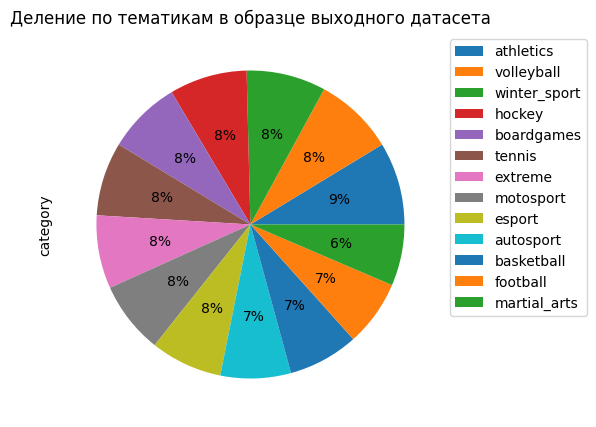

In [ ]:
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 8,5
df.category.value_counts().plot(kind='pie', title='Деление по тематикам в образце выходного датасета', autopct='%1.0f%%', labeldistance=None)
plt.legend(bbox_to_anchor=(1, 1));

In [ ]:
df_train.category.value_counts() # посмотрим насколько сбалансированны категории в тренировочном датасете

autosport       3160
extreme         3110
martial_arts    3050
motosport       3030
boardgames      3020
tennis          3000
esport          2990
athletics       2970
hockey          2950
volleyball      2950
football        2860
basketball      2850
winter_sport    2800
Name: category, dtype: int64

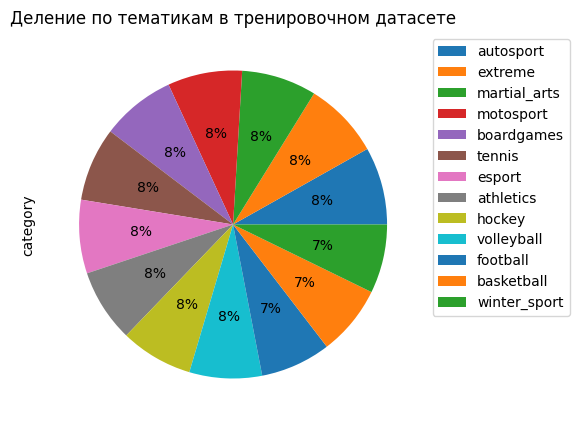

In [ ]:
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 8,5
df_train.category.value_counts().plot(kind='pie', title='Деление по тематикам в тренировочном датасете', autopct='%1.0f%%', labeldistance=None)
plt.legend(bbox_to_anchor=(1, 1));

__Данные более-менее сбалансированы.__

## Анализ по сообществам

In [ ]:
df.oid.nunique() # количество уникальных сообществ в выходном датасете

2626

In [ ]:
df_train.oid.nunique() # количество уникальных сообществ в train

3874

In [ ]:
df_test.oid.nunique() # количество уникальных сообществ в test

2626

In [ ]:
df_train.text.nunique() # количество уникальных текстов в train

35774

In [ ]:
df_train.text.shape[0]-df_train.text.nunique() # количество повторных текстов в train

2966

In [ ]:
df_test.text.nunique() # количество уникальных текстов в test

24833

In [ ]:
df_test.text.shape[0]-df_test.text.nunique() # количество повторных текстов в test

1427

In [ ]:
# количество текстов по сообществам и категориям в train
df_train_count = df_train.groupby(['oid', 'category']).size().reset_index(name='Count').sort_values(by='oid', ascending=True)
df_train_count

,oid,category,Count
0,16594,extreme,10
1,66573,winter_sport,10
2,84576,autosport,10
3,203396,extreme,10
4,621640,athletics,10
...,...,...,...
3869,998385654,volleyball,10
3870,999156041,boardgames,10
3871,999377741,volleyball,10
3872,999704370,hockey,10


In [ ]:
# количество текстов по сообществам в train
df_train_count = df_train.groupby(['oid']).size().reset_index(name='Count').sort_values(by='oid', ascending=True)
df_train_count

,oid,Count
0,16594,10
1,66573,10
2,84576,10
3,203396,10
4,621640,10
...,...,...
3869,998385654,10
3870,999156041,10
3871,999377741,10
3872,999704370,10


In [ ]:
# количество текстов по сообществам в test
df_test_count = df_test.groupby(['oid']).size().reset_index(name='Count').sort_values(by='oid', ascending=True)
df_test_count

,oid,Count
0,1622114,10
1,1663817,10
2,3174332,10
3,3469228,10
4,3905302,10
...,...,...
2621,998309713,10
2622,998565619,10
2623,999112505,10
2624,999361308,10


## Проверка наличия выбросов

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from tqdm.notebook import tqdm_notebook

tqdm_notebook.pandas()

### train

In [ ]:
# посмотрим длину текста в символах
df_train['text_len'] = df_train['text'].progress_apply(len)
df_train.sort_values(by='text_len', ascending=False)

  0%|          | 0/38740 [00:00<?, ?it/s]

,oid,category,text,text_len
20650,939179742,autosport,Сергей Сироткин объявил о завершении карьеры Б...,2980
6455,882513441,athletics,84 летний финишер и рекорд трассы. Результаты ...,2979
25399,580554180,volleyball,Егор Клюка Уехавшие играть за границу набирают...,2979
30372,474888561,autosport,Ну вот и началось ️Опубликован указ о частично...,2978
9972,815731697,motosport,MotoAmertokenoid полоса неудач завершена Данил...,2975
...,...,...,...,...
29216,686223057,motosport,Красивая электричка Но заменит ли бензиновый д...,55
3754,542037199,autosport,Ltokenoid ВЕРШИНА АВТОСПОРТА Формула 1 F1 Тран...,55
36582,624182094,hockey,А тем временем трейд. Усиляем 4 е звено крепки...,55
25181,362807077,autosport,В Сингапуре ожидают что уик энд пройдет ярче ч...,55


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


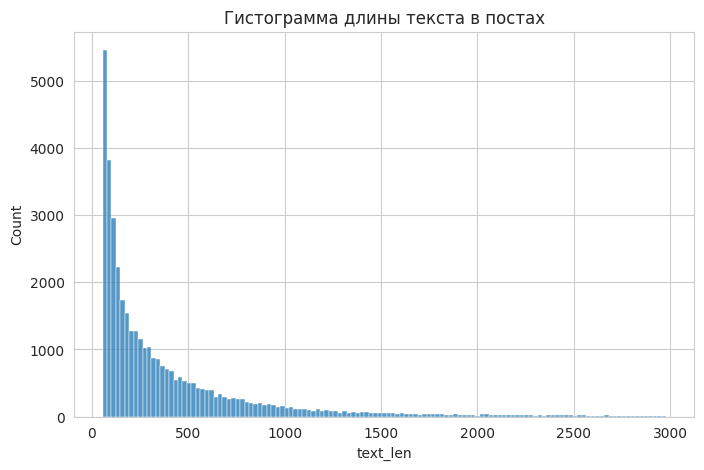

In [ ]:
sns.set_style('whitegrid')
plt.subplots(figsize=(8,5))
sns.histplot(x='text_len', data=df_train).set(xlabel='text_len', title='Гистограмма длины текста в постах');

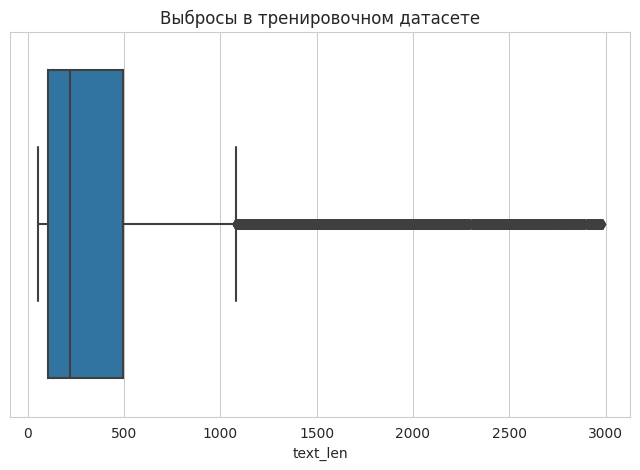

In [ ]:
sns.set_style('whitegrid')
plt.subplots(figsize=(8,5))
sns.boxplot(x='text_len', data=df_train).set(xlabel='text_len', title='Выбросы в тренировочном датасете');

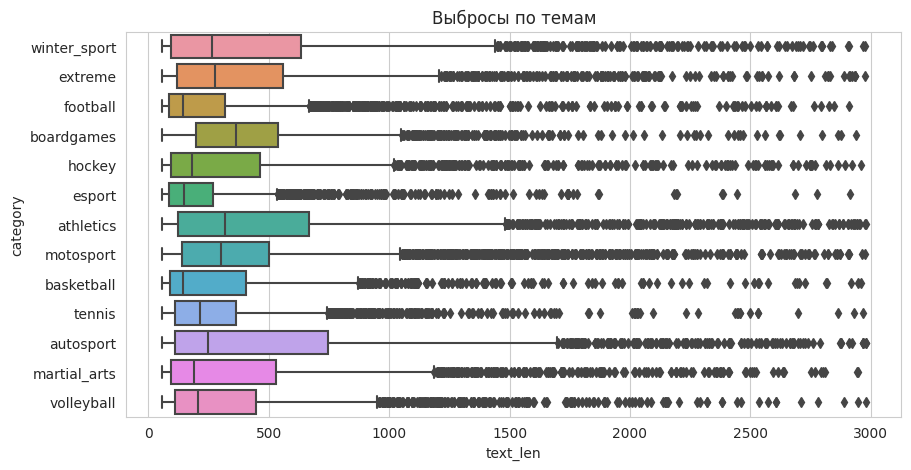

In [ ]:
sns.set_style('whitegrid')
plt.subplots(figsize=(10,5))
sns.boxplot(x='text_len', data=df_train,  y='category').set(xlabel='text_len', ylabel='category', title='Выбросы по темам');

Посты на тему футбола, киберспорта и тенниса короче постов остальных тем.

Много выбросов по всем темам.

### test

In [ ]:
# посмотрим длину текста в символах
df_test['text_len'] = df_test['text'].progress_apply(len)
df_test.sort_values(by='text_len', ascending=False)

  0%|          | 0/26260 [00:00<?, ?it/s]

,oid,text,text_len
11919,105159200,Новости спорта. Михаил Галактионов – новый Том...,2980
18786,57043301,Бег самое древнее занятие человечества человек...,2980
19870,324470724,WSS Доминик Эгертер стал 2 кратным чемпионом W...,2979
3392,772796121,Четырехкратный чемпион мира по биатлону Никола...,2978
8689,95581827,Карьера экс рекордсмена мира подходит к концу?...,2977
...,...,...,...
8248,185046019,Продолжаем вместе вспоминать историю Кубка губ...,55
11996,281743839,Шикарное видео по реставрации утопленного скей...,55
25225,9455401,Уезжаем с одним набранных очком Куньлунь 3 2 Т...,55
634,487808124,Прямая трансляция матча 33 Команд ЮХЛ Металлур...,55


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


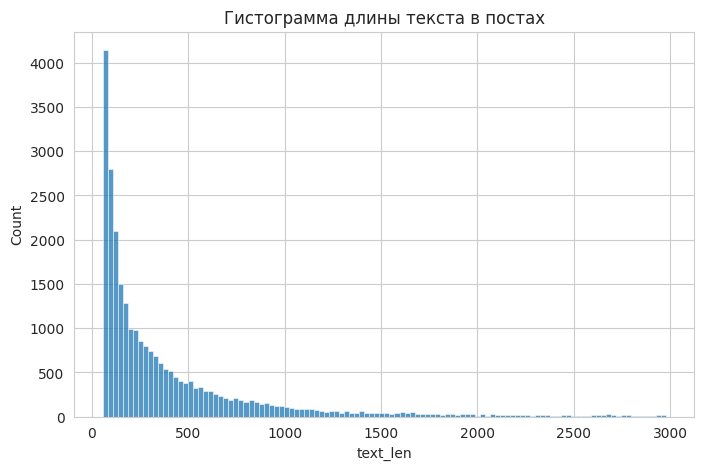

In [ ]:
sns.set_style('whitegrid')
plt.subplots(figsize=(8,5))
sns.histplot(x='text_len', data=df_test).set(xlabel='text_len', title='Гистограмма длины текста в постах');

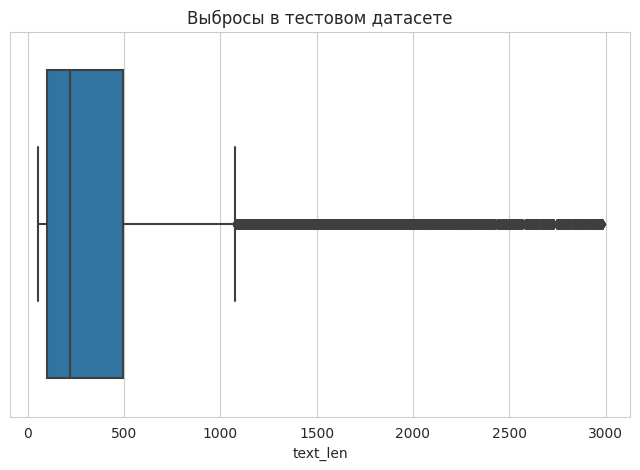

In [ ]:
sns.set_style('whitegrid')
plt.subplots(figsize=(8,5))
sns.boxplot(x='text_len', data=df_test).set(xlabel='text_len', title='Выбросы в тестовом датасете');

## Проверка наличия дубликатов

### train

In [ ]:
df_train_count = df_train.groupby(['text']).size().reset_index(name='Count').sort_values(by='Count', ascending=False)
df_train_count

,text,Count
12956,За кроссовками в Баскетбольный магазин Ghetto ...,163
15881,Коллеги традиционно объявляем очередной гильде...,50
19384,На сайте tokentokenoid В платной подписке доба...,33
24710,Приветствуем коллеги 33 А во что вы играли на ...,26
14701,КУРСОВЫЕ ДИПЛОМНЫЕ РЕФЕРАТЫ Помощь с выполнени...,21
...,...,...
12256,Егор Щукин возобновил карьеру и теперь будет и...,1
12255,Егор Шарангович сейчас в полном порядке. Напад...,1
12254,Егор Шарангович провел первый матч в новом сез...,1
12253,Егор Шарангович прервал личную серию неудач и ...,1


In [ ]:
# посмотрим наличие дубликатов текстов в тренировочном датасете
df_duplicates = df_train.groupby(['text']).nunique().sort_values(by='category', ascending=False)
df_duplicates_1 = df_duplicates[df_duplicates['category'] > 1]
df_duplicates_1

,oid,category
text,,
Вам не нужно теперь ломать голову что подарить на праздник. Порадуйте своих близких подарите им бурю эмоций 33 Цены снижены 33 Подробности здесь tokentokenoid,12,5
Шахматы и нарды ручной работы с любым рисунком и фото 33 Узнать подробнее tokentokenoid,5,5
Вам не нужно теперь ломать голову что подарить на праздник. Порадуйте своих близких подарите им бурю эмоций 33 Цены подробности здесь tokentokenoid,8,5
В связи с последними событиями многие россияне не могут платить свои долговые обязательства по кредитам 33 Сейчас есть возможность списать все кредиты кредитные карты микрозаймы долги по ЖКХ на законных основаниях с помощью нового юридического портала Юристы федерального сервиса помогут и все подробно расскажут. Все граждане РФ могут воспользоваться своим правом и обнулить кредиты и долги просто переходите по ссылке ответьте на несколько вопросов и узнайте как это можно сделать. Подробнее по ссылке,7,5
Пройди тест за 1 минуту и получи план тренировок на 28 дней Интересно? Жми,6,5
...,...,...
Желаете видеть свою рекламу здесь пишите в лс ИНТЕРЕСНО ПОЧИТАТЬ И ПОСМОТРЕТЬ Язык тела ~ мимика Любовный гороскоп магия История Германии История Кавказа tokenoid список еще 130 наших групп и контакты админа,4,2
Юридический факультет дистанционно или заочно Поступай Программы обучения Бакалавриат Магистратура Дополнительное профессиональное образование Колледж Бакалавриат Гражданско правовой профиль Уголовно правовой профиль Кем вы станете Судья ЗП 200 000 р. Адвокат ЗП 150 000 р. Нотариус ЗП 100 000 р. Юрисконсульт ЗП 90 000 р. ФОРМЫ ОБУЧЕНИЯ Программа вечернего обучения Посещение занятий 2 раза в неделю Зачеты и экзамены по учебному плану Возможность совмещать учебу с трудовой деятельностью Программа выходного дня Посещение занятий в субботу или воскресенье Зачеты и экзамены по учебного плану Возможность совмещать учебу с трудовой деятельность Дистанционное обучение Обучение в удобное время через интернет Удобный интернет портал где выгружены видео лекции и текстовые материалы Индивидуальный куратор который отвечает на любой вопрос в течение 24 часов Поступай,2,2
Однажды я заказал игровой ноут MSI Motokenoid всего за 7 тыс. рублей вместо 52 тыс. Просто промокод хороший попался. Видели бы вы лицо курьера который доставлял мне заказ. Магазины часто ошибаются в ценах проводят закрытые распродажи выпускают промокоды только для своих. Такие товары разбирают в считанные часы. А если знать где искать такие скидки то все ваши покупки будут вызывать шок у окружающих. Есть специальная группа где админ ловит такие скачки в ценах и дает на них наводки постит только те товары которые резко упали в цене и стали стоить ниже рынка 33 Благодаря этому многие люди смогли урвать айфоны телевизоры кроссовки и другие товары с огромным дисконтом. Канал называется Смотри что я нашел на Atokenoid. Подписавшись сегодня завтра ты уже сэкономишь кучу денег. Вот тебе ссылка,2,2


In [ ]:
# смотрим пример повторов
df_train[df_train.text=='Шахматы и нарды ручной работы с любым рисунком и фото 33 Узнать подробнее tokentokenoid']

,oid,category,text
9835,886977381,martial_arts,Шахматы и нарды ручной работы с любым рисунком...
11887,884148780,football,Шахматы и нарды ручной работы с любым рисунком...
23724,410518766,hockey,Шахматы и нарды ручной работы с любым рисунком...
31019,643475045,autosport,Шахматы и нарды ручной работы с любым рисунком...
35563,442208575,basketball,Шахматы и нарды ручной работы с любым рисунком...


In [ ]:
# смотрим пример повторов
df_train[df_train.text=='Вам не нужно теперь ломать голову что подарить на праздник. Порадуйте своих близких подарите им бурю эмоций 33 Цены снижены 33 Подробности здесь tokentokenoid']

,oid,category,text
1468,240880977,martial_arts,Вам не нужно теперь ломать голову что подарить...
2130,240880977,martial_arts,Вам не нужно теперь ломать голову что подарить...
3394,678388264,martial_arts,Вам не нужно теперь ломать голову что подарить...
3702,266268956,autosport,Вам не нужно теперь ломать голову что подарить...
5353,896445079,martial_arts,Вам не нужно теперь ломать голову что подарить...
7384,822453689,martial_arts,Вам не нужно теперь ломать голову что подарить...
10025,165101188,autosport,Вам не нужно теперь ломать голову что подарить...
14125,39440571,autosport,Вам не нужно теперь ломать голову что подарить...
14806,684043943,volleyball,Вам не нужно теперь ломать голову что подарить...
21362,747231562,hockey,Вам не нужно теперь ломать голову что подарить...


In [ ]:
# смотрим пример повторов
df_train[df_train.text=='Для тех кто хочет побеждать 33 Четыре ключа к твоим победам Жизнь человека состоит из четырех сфер физической – это наше здоровье социальной – отношения с окружающими интеллектуальной – образование навыки духовной – наш внутренний мир жизненные ценности. Это как четыре колеса у автомобиля. Если хоть одно колесо неисправно машина не сможет нормально ехать. Развитие в четырех сферах жизни – это ключ к победам и реализация заложенного в каждом из нас потенциала.']

,oid,category,text
6343,548764343,athletics,Для тех кто хочет побеждать 33 Четыре ключа к ...
33345,646711387,extreme,Для тех кто хочет побеждать 33 Четыре ключа к ...


Можно сделать вывод, что повторяющиеся посты - это реклама и спам. Одинаковые тексты отправляются от разных пользователей с указанием разной тематики, не соответствующей содержанию текста.

### test

In [ ]:
df_test_count = df_test.groupby(['text']).size().reset_index(name='Count').sort_values(by='Count', ascending=False)
df_test_count

,text,Count
8810,За кроссовками в Баскетбольный магазин Ghetto ...,105
10840,Коллеги традиционно объявляем очередной гильде...,21
17085,Приветствуем коллеги 33 А во что вы играли на ...,19
10039,КУРСОВЫЕ ДИПЛОМНЫЕ РЕФЕРАТЫ Помощь с выполнени...,16
13465,На сайте tokentokenoid В платной подписке доба...,16
...,...,...
8452,Если вы томительно ждете начала гонки то предл...,1
8451,Если вы тоже знаете что 22 это гуси лебеди а 1...,1
8450,Если вы собираетесь сделать ставку на исход кв...,1
8449,Если вы смотрите аниме или увлекаетесь японско...,1


In [ ]:
# посмотрим наличие дубликатов текстов в тестовом датасете
df_duplicates = df_test.groupby(['text']).nunique().sort_values(by='oid', ascending=False)
#df_duplicates_1 = df_duplicates[df_duplicates['category'] > 1]
df_duplicates

,oid
text,
За кроссовками в Баскетбольный магазин Ghetto Basket Shop Консультация tokenoidtokenoid Стрельский,61
КУРСОВЫЕ ДИПЛОМНЫЕ РЕФЕРАТЫ Помощь с выполнением курсовых дипломных контрольных и других работ по низким ценам и в короткие сроки 33 Переходи к нам по tokenoidtokenoid ссылке,15
Коллеги традиционно объявляем очередной гильдейский настольныйсубботник ГРаНИ 33 По аналогии с индустрией компьютерных игр это предложение по субботам в течение дня выкладывать в комментарии к посту фото своих разработок с кратким описанием. А в ответ на выложенное другими интересоваться советовать предлагать сотрудничество и просто ставить лайки. Рассказывайте над чем сейчас работаете?,15
Приветствуем коллеги 33 А во что вы играли на прошедшей неделе? По понедельникам у нас регулярная рубрика вочтоиграютавторы 33 В ней мы предлагаем вам поделиться о сыгранном за прошедшую неделю. Мы хотим взглянуть на уже изданные настольные игры глазами геймдизайнеров 33 Удалось ли познакомиться с чем то новым? Какие механики запомнились больше всего? Делимся и обсуждаем гильдияразработчиковнастольныхигр,13
Приветствуем коллеги 33 А во что вы играли на прошедшей неделе? По понедельникам у нас регулярная рубрика вочтоиграютавторы 33 В ней предлагаем вам поделиться о сыгранном за прошедшую неделю. Мы хотим взглянуть на уже изданные настольные игры глазами геймдизайнеров 33 Удалось ли познакомиться с чем то новым? Какие механики запомнились больше всего? Делимся и обсуждаем гильдияразработчиковнастольныхигр,12
...,...
Если все катится в яму Ты знаешь место где все наладится,1
Если вдруг у вас нет планов на эти выходные то вот интересный вариант парной трени. Кажется что складки на талии раглаживаются уже просто при просмотре этого ролика komtokenoid,1
Если вдруг пропустили игровой стрим BasketStream с Марком Бурчаковым. Играли в симулятор баскетбольного ГМ НБА и пытались провести перестройку Бостона после обмена Пола Пирса и Кевина Гарнетта в Бруклин и принести чемпионство кельтам раньше чем это удалось Дэнни Эйнджу. Приятного просмотра 33,1


In [ ]:
# смотрим пример повторов
df_test[df_test.text=='За кроссовками в Баскетбольный магазин Ghetto Basket Shop Консультация tokenoidtokenoid Стрельский']

,oid,text
407,595894929,За кроссовками в Баскетбольный магазин Ghetto ...
512,162043401,За кроссовками в Баскетбольный магазин Ghetto ...
888,148389602,За кроссовками в Баскетбольный магазин Ghetto ...
1141,595894929,За кроссовками в Баскетбольный магазин Ghetto ...
1198,227716111,За кроссовками в Баскетбольный магазин Ghetto ...
...,...,...
25084,959923306,За кроссовками в Баскетбольный магазин Ghetto ...
25343,588021734,За кроссовками в Баскетбольный магазин Ghetto ...
25402,410422939,За кроссовками в Баскетбольный магазин Ghetto ...
25612,194289811,За кроссовками в Баскетбольный магазин Ghetto ...


Можно сделать вывод, что повторяющиеся посты - это реклама и спам. Одинаковые тексты отправляются от разных пользователей.

# Удаление дубликатов в обучающем датасете

In [ ]:
# удаляем дубликаты
df_train_1=df_train.drop_duplicates(subset=['text'], keep='first', inplace=False) # keep='first': удалить дубликаты, кроме первого вхождения
df_train_1

,oid,category,text
0,365271984,winter_sport,Волшебные фото Виктория Поплавская ЕвгенияМедв...
1,503385563,extreme,Возвращение в подземелье Треша 33 Эйфория тупо...
2,146016084,football,Лучшие чешские вратари – Доминик Доминатор Гаш...
3,933865449,boardgames,Rtokenoid Warhammer40k валрак решил нас подкор...
4,713550145,hockey,Шестеркин затаскивает Рейнджерс в финал Восточ...
...,...,...,...
38735,910636962,autosport,8 битная буря снова накрыла пикселями автомоби...
38736,669736851,autosport,Ира Сидоркова объясняет как сказалась на ее ма...
38737,558919241,tennis,24 я ракетка мира хорват Марин Чилич обыграл и...
38738,776944963,volleyball,Стал известен календарь мужской сборной России...


In [ ]:
print('В результате удаления спама потеряли', round(((df_train.shape[0]-df_train_1.shape[0])/df_train.shape[0])*100), '% данных, это в пределах рекоменуемых 10%')

В результате удаления спама потеряли 8 % данных, это в пределах рекоменуемых 10%


In [ ]:
df_train_1.category.value_counts() # смотрю сбалансированность категорий после удаления дубликатов

autosport       3015
tennis          2929
hockey          2897
martial_arts    2885
football        2785
volleyball      2773
extreme         2758
winter_sport    2730
motosport       2720
esport          2713
athletics       2593
boardgames      2524
basketball      2452
Name: category, dtype: int64

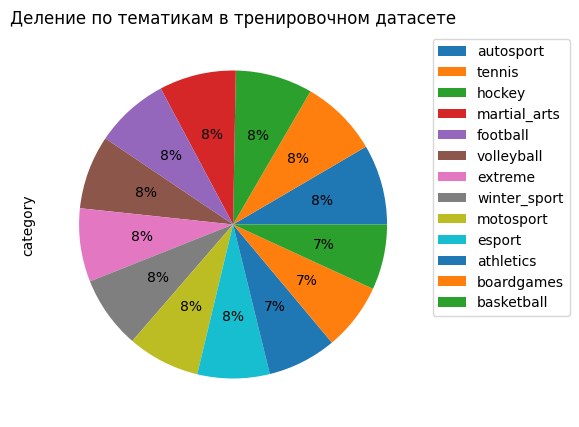

In [ ]:
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 8,5
df_train_1.category.value_counts().plot(kind='pie', title='Деление по тематикам в тренировочном датасете', autopct='%1.0f%%', labeldistance=None)
plt.legend(bbox_to_anchor=(1, 1));

Разброс между категориями стал больше, но остался приемлемым. Можно считать данные сбалансированными.

# Baseline на классификации необработанных n-грамм

## Составление тренировочного и валидационного множества для необработанных данных

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
le.fit(df_train_1.category)

LabelEncoder()

In [ ]:
 # пример расшифровки
le.transform( ['athletics', 'volleyball', 'winter_sport', 'hockey', 'boardgames', 'tennis', 'extreme', 'motosport', 'esport', 'autosport', 'basketball', 'football', 'martial_arts'])

array([ 0, 11, 12,  7,  3, 10,  5,  9,  4,  1,  2,  6,  8])

In [ ]:
y = pd.Series (le.transform(df_train_1.category))


In [ ]:
y.head(13)

0     12
1      5
2      6
3      3
4      7
5      3
6      7
7      4
8      0
9      9
10     2
11    10
12     9
dtype: int64

In [ ]:
X=df_train_1.text

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
print(df_train_1.shape[0])
print(X_train.shape)
print(X_val.shape)

35774
(26830,)
(8944,)


## С векторизатором CountVectorizer

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report, confusion_matrix

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
le.inverse_transform([0,1,2,3,4,5,6,7,8,9,10,11,12])

array(['athletics', 'autosport', 'basketball', 'boardgames', 'esport',
       'extreme', 'football', 'hockey', 'martial_arts', 'motosport',
       'tennis', 'volleyball', 'winter_sport'], dtype=object)

In [ ]:
vec_1 = CountVectorizer(ngram_range=(1, 1)) # униграммы
bow_1 = vec_1.fit_transform(X_train)
clf_1 = LogisticRegression(random_state=42)
clf_1.fit(bow_1, y_train)
pred_1 = clf_1.predict(vec_1.transform(X_val))
print(classification_report(pred_1, y_val, target_names=['athletics', 'autosport', 'basketball', 'boardgames', 'esport',
       'extreme', 'football', 'hockey', 'martial_arts', 'motosport',
       'tennis', 'volleyball', 'winter_sport']))

              precision    recall  f1-score   support

   athletics       0.84      0.90      0.87       594
   autosport       0.83      0.85      0.84       760
  basketball       0.81      0.89      0.85       555
  boardgames       0.89      0.93      0.91       617
      esport       0.79      0.68      0.73       785
     extreme       0.73      0.67      0.70       747
    football       0.77      0.70      0.73       756
      hockey       0.82      0.83      0.82       708
martial_arts       0.76      0.74      0.75       715
   motosport       0.86      0.89      0.87       668
      tennis       0.93      0.95      0.94       727
  volleyball       0.82      0.89      0.86       658
winter_sport       0.83      0.83      0.83       654

    accuracy                           0.82      8944
   macro avg       0.82      0.83      0.82      8944
weighted avg       0.82      0.82      0.82      8944



In [ ]:
vec_2 = CountVectorizer(ngram_range=(2, 2)) # биграммы
bow_2 = vec_2.fit_transform(X_train)
clf_2 = LogisticRegression(random_state=42)
clf_2.fit(bow_2, y_train)
pred_2 = clf_2.predict(vec_2.transform(X_val))
print(classification_report(pred_2, y_val, target_names=['athletics', 'autosport', 'basketball', 'boardgames', 'esport',
       'extreme', 'football', 'hockey', 'martial_arts', 'motosport',
       'tennis', 'volleyball', 'winter_sport']))

              precision    recall  f1-score   support

   athletics       0.75      0.92      0.82       519
   autosport       0.65      0.80      0.71       631
  basketball       0.64      0.80      0.71       493
  boardgames       0.78      0.95      0.85       532
      esport       0.64      0.45      0.53       951
     extreme       0.62      0.65      0.64       647
    football       0.70      0.36      0.47      1338
      hockey       0.66      0.69      0.68       676
martial_arts       0.67      0.62      0.64       754
   motosport       0.72      0.88      0.79       568
      tennis       0.83      0.95      0.89       656
  volleyball       0.69      0.84      0.75       588
winter_sport       0.72      0.80      0.76       591

    accuracy                           0.70      8944
   macro avg       0.70      0.75      0.71      8944
weighted avg       0.69      0.70      0.68      8944



In [ ]:
vec_3 = CountVectorizer(ngram_range=(3, 3)) # триграммы
bow_3 = vec_3.fit_transform(X_train)
clf_3 = LogisticRegression(random_state=42)
clf_3.fit(bow_3, y_train)
pred_3 = clf_3.predict(vec_3.transform(X_val))
print(classification_report(pred_3, y_val, target_names=['athletics', 'autosport', 'basketball', 'boardgames', 'esport',
       'extreme', 'football', 'hockey', 'martial_arts', 'motosport',
       'tennis', 'volleyball', 'winter_sport']))

              precision    recall  f1-score   support

   athletics       0.63      0.97      0.76       413
   autosport       0.43      0.72      0.54       463
  basketball       0.39      0.79      0.52       302
  boardgames       0.57      0.98      0.72       377
      esport       0.45      0.45      0.45       680
     extreme       0.44      0.87      0.58       343
    football       0.78      0.15      0.25      3534
      hockey       0.45      0.59      0.51       535
martial_arts       0.40      0.54      0.46       513
   motosport       0.53      0.94      0.68       395
      tennis       0.62      0.88      0.73       525
  volleyball       0.54      0.89      0.68       435
winter_sport       0.51      0.77      0.61       429

    accuracy                           0.52      8944
   macro avg       0.52      0.73      0.58      8944
weighted avg       0.61      0.52      0.46      8944



## С векторизатором TfidfVectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vec_4 = TfidfVectorizer(ngram_range=(1, 1)) # униграммы
bow_4 = vec_4.fit_transform(X_train)
clf_4 = LogisticRegression(random_state=42)
clf_4.fit(bow_4, y_train)
pred_4 = clf_4.predict(vec_4.transform(X_val))
print(classification_report(pred_4, y_val, target_names=['athletics', 'autosport', 'basketball', 'boardgames', 'esport',
       'extreme', 'football', 'hockey', 'martial_arts', 'motosport',
       'tennis', 'volleyball', 'winter_sport']))

              precision    recall  f1-score   support

   athletics       0.81      0.94      0.87       550
   autosport       0.85      0.90      0.87       739
  basketball       0.78      0.96      0.86       497
  boardgames       0.90      0.91      0.91       643
      esport       0.78      0.74      0.76       715
     extreme       0.79      0.57      0.66       953
    football       0.79      0.75      0.77       731
      hockey       0.85      0.87      0.86       697
martial_arts       0.77      0.75      0.76       718
   motosport       0.85      0.91      0.88       647
      tennis       0.94      0.97      0.95       718
  volleyball       0.81      0.89      0.85       648
winter_sport       0.86      0.82      0.84       688

    accuracy                           0.83      8944
   macro avg       0.83      0.84      0.83      8944
weighted avg       0.83      0.83      0.83      8944



In [ ]:
vec_5 = TfidfVectorizer(ngram_range=(2, 2)) # биграммы
bow_5 = vec_5.fit_transform(X_train)
clf_5 = LogisticRegression(random_state=42)
clf_5.fit(bow_5, y_train)
pred_5 = clf_5.predict(vec_5.transform(X_val))
print(classification_report(pred_5, y_val, target_names=['athletics', 'autosport', 'basketball', 'boardgames', 'esport',
       'extreme', 'football', 'hockey', 'martial_arts', 'motosport',
       'tennis', 'volleyball', 'winter_sport']))

              precision    recall  f1-score   support

   athletics       0.79      0.94      0.86       535
   autosport       0.77      0.73      0.75       819
  basketball       0.63      0.90      0.74       431
  boardgames       0.83      0.84      0.84       637
      esport       0.56      0.63      0.60       602
     extreme       0.66      0.64      0.65       698
    football       0.64      0.50      0.56       889
      hockey       0.74      0.66      0.70       806
martial_arts       0.75      0.51      0.60      1024
   motosport       0.76      0.89      0.82       587
      tennis       0.86      0.94      0.90       680
  volleyball       0.69      0.88      0.77       558
winter_sport       0.77      0.75      0.76       678

    accuracy                           0.73      8944
   macro avg       0.73      0.75      0.73      8944
weighted avg       0.73      0.73      0.72      8944



In [ ]:
vec_6 = TfidfVectorizer(ngram_range=(3, 3)) # триграммы
bow_6 = vec_6.fit_transform(X_train)
clf_6 = LogisticRegression(random_state=42)
clf_6.fit(bow_6, y_train)
pred_6 = clf_6.predict(vec_6.transform(X_val))
print(classification_report(pred_6, y_val, target_names=['athletics', 'autosport', 'basketball', 'boardgames', 'esport',
       'extreme', 'football', 'hockey', 'martial_arts', 'motosport',
       'tennis', 'volleyball', 'winter_sport']))

              precision    recall  f1-score   support

   athletics       0.69      0.94      0.80       470
   autosport       0.62      0.51      0.56       950
  basketball       0.40      0.91      0.55       267
  boardgames       0.70      0.88      0.78       516
      esport       0.40      0.68      0.50       393
     extreme       0.48      0.79      0.59       415
    football       0.34      0.48      0.40       484
      hockey       0.56      0.53      0.54       750
martial_arts       0.78      0.21      0.33      2583
   motosport       0.61      0.92      0.73       461
      tennis       0.73      0.85      0.78       641
  volleyball       0.58      0.90      0.70       461
winter_sport       0.59      0.70      0.64       553

    accuracy                           0.58      8944
   macro avg       0.57      0.71      0.61      8944
weighted avg       0.63      0.58      0.54      8944



## Выбор Baseline

In [ ]:
data = {'accuracy':['0.82', '0.70', '0.52', '0.83', '0.73', '0.58']}
df_res = pd.DataFrame(data, index =['униграммы CountVectorizer', 'биграммы CountVectorizer', 'триграммы CountVectorizer', 'униграммы TfidfVectorizer', 'биграммы TfidfVectorizer', 'триграммы TfidfVectorizer'])
df_res.style.highlight_max(color = 'lightgreen', axis = 0)


,accuracy
униграммы CountVectorizer,0.82
биграммы CountVectorizer,0.70
триграммы CountVectorizer,0.52
униграммы TfidfVectorizer,0.83
биграммы TfidfVectorizer,0.73
триграммы TfidfVectorizer,0.58


__За Baseline принимаем модель с векторизатором TfidfVectorizer на униграммах.__

# Предобработка данных тренировочного датасета

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from tqdm.notebook import tqdm_notebook

tqdm_notebook.pandas()

In [ ]:
import re
regex = re.compile("[а-я]+")

def words_only(text, regex=regex):
    try:
        return " ".join(regex.findall(text))
    except:
        return ""

In [ ]:
# токенизация
df_train_1['text_words'] = df_train_1['text'].str.lower().progress_apply(words_only)

  0%|          | 0/35774 [00:00<?, ?it/s]

In [ ]:
df_train_1.head()

,oid,category,text,text_words
0,365271984,winter_sport,Волшебные фото Виктория Поплавская ЕвгенияМедв...,волшебные фото виктория поплавская евгениямедв...
1,503385563,extreme,Возвращение в подземелье Треша 33 Эйфория тупо...,возвращение в подземелье треша эйфория тупости...
2,146016084,football,Лучшие чешские вратари – Доминик Доминатор Гаш...,лучшие чешские вратари доминик доминатор гашек...
3,933865449,boardgames,Rtokenoid Warhammer40k валрак решил нас подкор...,валрак решил нас подкормить не сильно свежими ...
4,713550145,hockey,Шестеркин затаскивает Рейнджерс в финал Восточ...,шестеркин затаскивает рейнджерс в финал восточ...


In [ ]:
# подсчёт слов
df_train_1['words_count'] = df_train_1['text_words'].progress_apply(lambda x: len(x.split()))

  0%|          | 0/35774 [00:00<?, ?it/s]

In [ ]:
df_train_1.words_count.describe()

count    35774.000000
mean        54.539694
std         66.089089
min          2.000000
25%         14.000000
50%         29.000000
75%         67.000000
max        518.000000
Name: words_count, dtype: float64

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


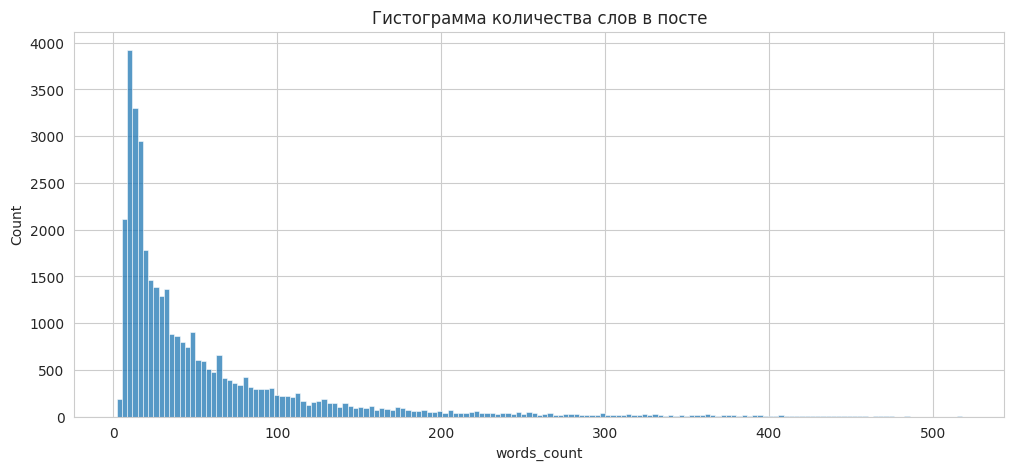

In [ ]:
sns.set_style('whitegrid')
plt.subplots(figsize=(12,5))
sns.histplot(x='words_count', data=df_train_1).set(xlabel='words_count', title='Гистограмма количества слов в посте');

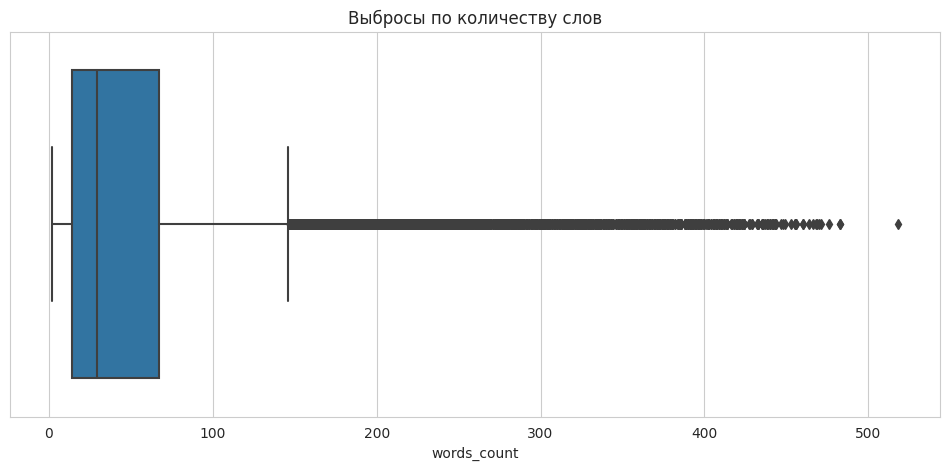

In [ ]:
sns.set_style('whitegrid')
plt.subplots(figsize=(12,5))
sns.boxplot(x='words_count', data=df_train_1).set(xlabel='words_count', title='Выбросы по количеству слов');

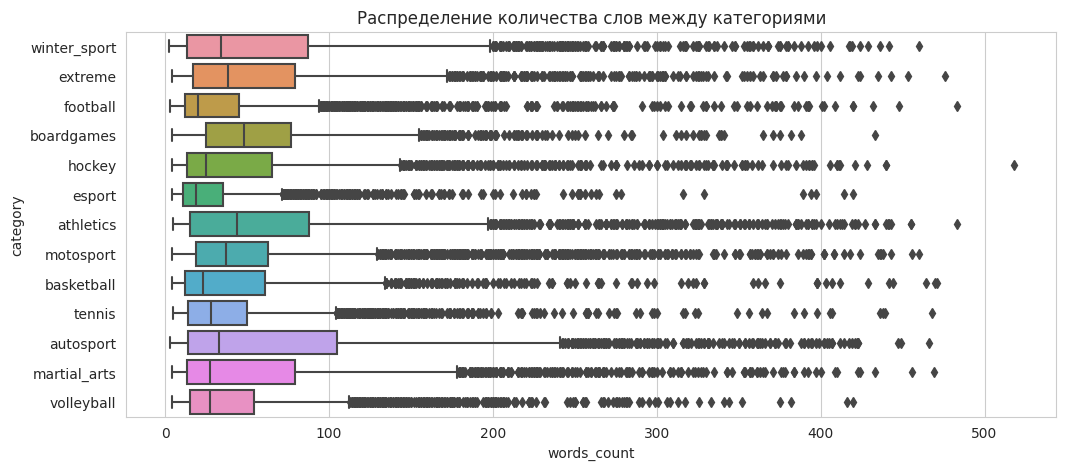

In [ ]:
sns.set_style('whitegrid')
plt.subplots(figsize=(12,5))
sns.boxplot(x='words_count', data=df_train_1,  y='category').set(xlabel='words_count', ylabel='category', title='Распределение количества слов между категориями');

Посты на тему футбола, киберспорта, тенниса и волейбола короче по сравнению с другими темами.

Много выбросов по всем темам.

In [ ]:
from nltk.tokenize import word_tokenize

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from string import punctuation
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
from collections import Counter
corpus = [token for tweet in df_train_1.text_words for token in word_tokenize(tweet) if token not in punctuation]

In [ ]:
freq_dict = Counter(corpus) #составляем частотный словарь

freq_dict.most_common(10) # 10 самых частых слов

[('в', 77959),
 ('и', 55200),
 ('на', 39656),
 ('с', 24915),
 ('не', 23703),
 ('что', 19917),
 ('по', 14057),
 ('я', 12373),
 ('за', 11344),
 ('это', 10827)]

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
print(stopwords.words('russian'))

['и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с', 'со', 'как', 'а', 'то', 'все', 'она', 'так', 'его', 'но', 'да', 'ты', 'к', 'у', 'же', 'вы', 'за', 'бы', 'по', 'только', 'ее', 'мне', 'было', 'вот', 'от', 'меня', 'еще', 'нет', 'о', 'из', 'ему', 'теперь', 'когда', 'даже', 'ну', 'вдруг', 'ли', 'если', 'уже', 'или', 'ни', 'быть', 'был', 'него', 'до', 'вас', 'нибудь', 'опять', 'уж', 'вам', 'ведь', 'там', 'потом', 'себя', 'ничего', 'ей', 'может', 'они', 'тут', 'где', 'есть', 'надо', 'ней', 'для', 'мы', 'тебя', 'их', 'чем', 'была', 'сам', 'чтоб', 'без', 'будто', 'чего', 'раз', 'тоже', 'себе', 'под', 'будет', 'ж', 'тогда', 'кто', 'этот', 'того', 'потому', 'этого', 'какой', 'совсем', 'ним', 'здесь', 'этом', 'один', 'почти', 'мой', 'тем', 'чтобы', 'нее', 'сейчас', 'были', 'куда', 'зачем', 'всех', 'никогда', 'можно', 'при', 'наконец', 'два', 'об', 'другой', 'хоть', 'после', 'над', 'больше', 'тот', 'через', 'эти', 'нас', 'про', 'всего', 'них', 'какая', 'много', 'разве', 'три', 'эту', 'моя', 'впр

In [ ]:
noise = stopwords.words('russian')+list(punctuation)

In [ ]:
corpus = [token for tweet in df_train_1.text_words for token in word_tokenize(tweet) if token not in noise]

In [ ]:
from wordcloud import WordCloud

In [ ]:
all_words = " ".join(review for review in corpus)

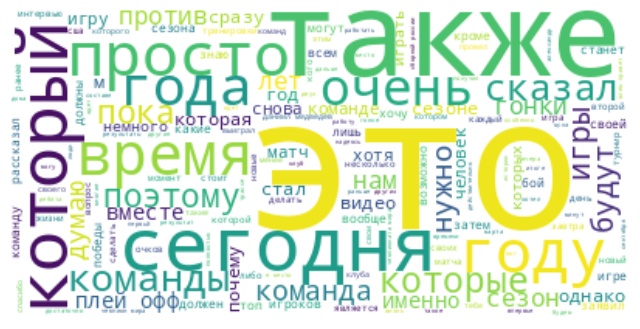

In [ ]:
wordcloud = WordCloud(background_color="white").generate(all_words)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
# на основании облака слов корректируем список стоп-слов
noise_1 = stopwords.words('russian') +list(punctuation)+['это','также','который','сегодня','просто','нужно','однако','очень','поэтому','которая','немного','которые','почему','сразу','могут','хотя','снова', 'пока', 'будут', 'м','всем','й','г','своей','года','нам','свой','лет','год','дня','несколько','мск']

In [ ]:
def remove_stopwords(text, mystopwords = noise_1):
    try:
        return " ".join([token for token in text.split() if not token in mystopwords])
    except:
        return ""

In [ ]:
# стоп-слова и пунктуация
df_train_1['text_without_stop_words'] = df_train_1['text_words'].progress_apply(remove_stopwords)

  0%|          | 0/35774 [00:00<?, ?it/s]

In [ ]:
corpus = [token for tweet in df_train_1.text_without_stop_words for token in word_tokenize(tweet)]

In [ ]:
freq_dict = Counter(corpus) #составляем частотный словарь

freq_dict.most_common(10) # 10 самых частых слов

[('время', 3279),
 ('россии', 3021),
 ('мира', 2914),
 ('команды', 2522),
 ('место', 2265),
 ('день', 2233),
 ('году', 2073),
 ('матч', 2014),
 ('игры', 1962),
 ('бег', 1719)]

In [ ]:
!pip install pymorphy2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 66.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13707 sha256=68067724e9e3a6892fd3836f2b39aefafc6b8c935a784371562319e4b05cf0ef
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt


In [ ]:
import pymorphy2
m = pymorphy2.MorphAnalyzer()

In [ ]:
def lemmatize(text, morph=m):
    try:
        return ' '.join([morph.parse(word)[0].normal_form for word in text.split()])
    except:
        return " "


In [ ]:
# лемматизация
df_train_1['lemma'] = df_train_1['text_without_stop_words'].progress_apply(lemmatize)

  0%|          | 0/35774 [00:00<?, ?it/s]

In [ ]:
corpus = [token for tweet in df_train_1.lemma for token in word_tokenize(tweet)]

In [ ]:
freq_dict = Counter(corpus) #составляем частотный словарь

freq_dict.most_common(10) # 10 самых частых слов

[('команда', 7159),
 ('матч', 6680),
 ('игра', 6431),
 ('первый', 5713),
 ('наш', 5562),
 ('сезон', 4894),
 ('время', 4634),
 ('хороший', 4560),
 ('новый', 4517),
 ('свой', 4471)]

Почему-то опять появились стоп-слова, прогоню ещё раз

In [ ]:
def remove_stopwords(text, mystopwords = noise_1+['наш','мочь','каждый','любой','самый','смочь','должный']):
    try:
        return " ".join([token for token in text.split() if not token in mystopwords])
    except:
        return ""

In [ ]:
df_train_1['lemma'] = df_train_1['lemma'].progress_apply(remove_stopwords)

  0%|          | 0/35774 [00:00<?, ?it/s]

In [ ]:
corpus = [token for tweet in df_train_1.lemma for token in word_tokenize(tweet)]

In [ ]:
all_words = " ".join(review for review in corpus)

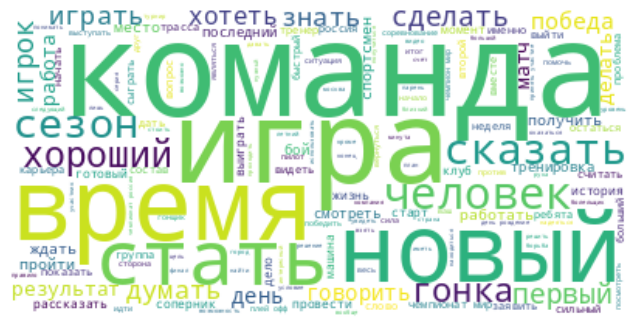

In [ ]:
wordcloud = WordCloud(background_color="white").generate(all_words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
df_train_1['words_count_lemma'] = df_train_1['lemma'].progress_apply(lambda x: len(x.split()))

  0%|          | 0/35774 [00:00<?, ?it/s]

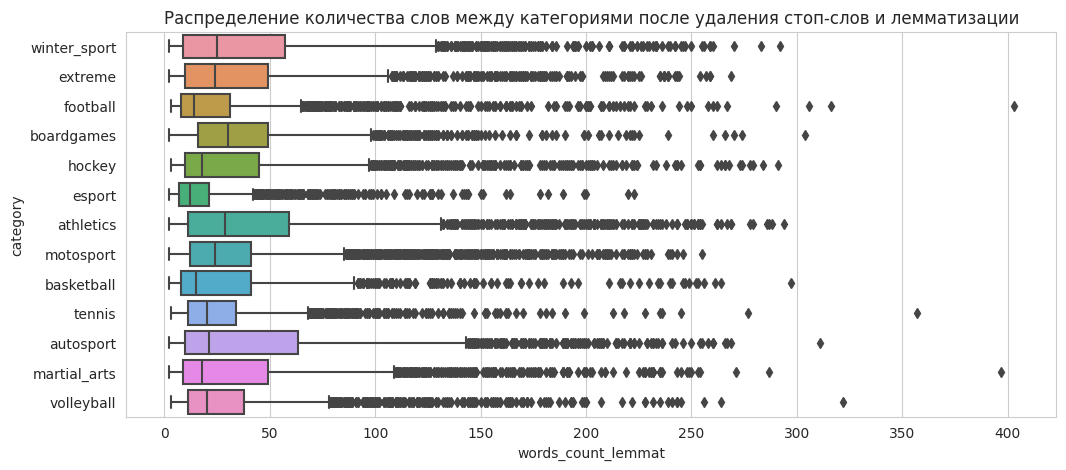

In [ ]:
sns.set_style('whitegrid')
plt.subplots(figsize=(12,5))
sns.boxplot(x='words_count_lemma', data=df_train_1,  y='category').set(xlabel='words_count_lemmat', ylabel='category', title='Распределение количества слов между категориями после удаления стоп-слов и лемматизации');

По всем темам значения сдвинулись, при этом выбросы остались.

In [ ]:
df_train_1.to_csv (r'1_train_1_full.csv', index = None, header=True)

In [ ]:
#df_train_1=df_train_1.drop(['text','text_words','text_without_stop_words', 'words_count'], axis=1) # удалили не нужные далее столбцы

# Модель Baseline на предобработанных данных

In [ ]:
df_train_1 = pd.read_csv('1_train_1_full.csv')

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
le.fit(df_train_1.category)

In [ ]:
y = pd.Series (le.transform(df_train_1.category))

In [ ]:
X=df_train_1.lemma

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
print(df_train_1.shape[0])
print(X_train.shape)
print(X_val.shape)

35774
(26830,)
(8944,)


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.decomposition import TruncatedSVD, LatentDirichletAllocation
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report, confusion_matrix

In [ ]:
le.inverse_transform([0,1,2,3,4,5,6,7,8,9,10,11,12])

array(['athletics', 'autosport', 'basketball', 'boardgames', 'esport',
       'extreme', 'football', 'hockey', 'martial_arts', 'motosport',
       'tennis', 'volleyball', 'winter_sport'], dtype=object)

In [ ]:
ppl_clf_2 = Pipeline([
    ('vect', TfidfVectorizer(ngram_range=(1, 1))),
    ('clf', LogisticRegression(random_state=42))])

In [ ]:
ppl_clf_2.fit(X_train, y_train)

Pipeline(steps=[('vect', TfidfVectorizer()),
                ('clf', LogisticRegression(random_state=42))])

In [ ]:
pred_ppl_clf_2 = ppl_clf_2.predict(X_val)
print(classification_report(pred_ppl_clf_2, y_val,target_names=['athletics', 'autosport', 'basketball', 'boardgames', 'esport',
       'extreme', 'football', 'hockey', 'martial_arts', 'motosport',
       'tennis', 'volleyball', 'winter_sport']))

              precision    recall  f1-score   support

   athletics       0.84      0.93      0.88       575
   autosport       0.83      0.88      0.85       735
  basketball       0.83      0.95      0.88       533
  boardgames       0.91      0.91      0.91       647
      esport       0.77      0.69      0.73       756
     extreme       0.80      0.59      0.68       933
    football       0.80      0.84      0.82       648
      hockey       0.85      0.89      0.87       677
martial_arts       0.79      0.74      0.76       738
   motosport       0.84      0.87      0.86       669
      tennis       0.93      0.97      0.95       719
  volleyball       0.82      0.92      0.87       634
winter_sport       0.87      0.84      0.86       680

    accuracy                           0.84      8944
   macro avg       0.84      0.85      0.84      8944
weighted avg       0.83      0.84      0.83      8944



In [ ]:
data = {'accuracy':['0.83', '0.84']}
df_res = pd.DataFrame(data, index =['Baseline', 'Baseline + обработка'])
df_res.style.highlight_max(color = 'lightgreen', axis = 0)


,accuracy
Baseline,0.83
Baseline + обработка,0.84


После предобработки данных метрика улучшилась

# Удаление выбросов

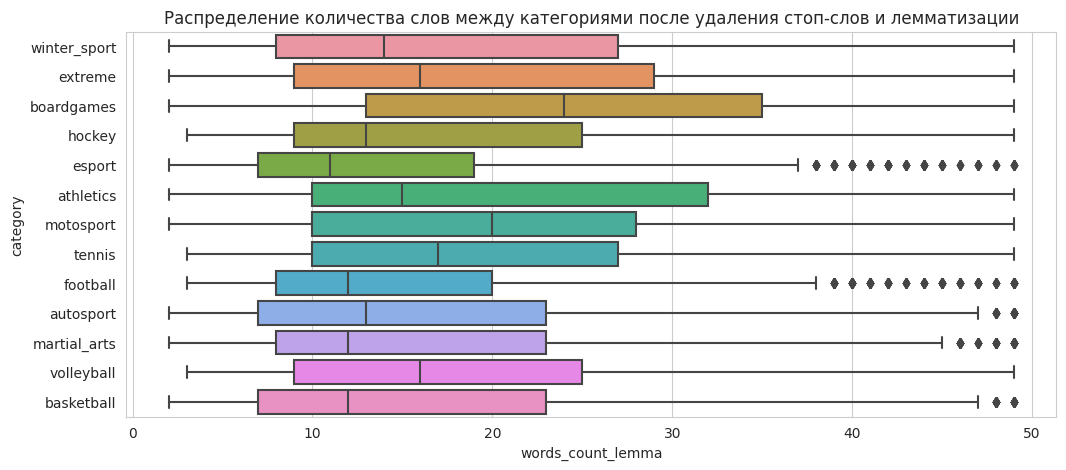

In [ ]:
fltr = df_train_1['words_count_lemma'] < 50
sns.set_style('whitegrid')
plt.subplots(figsize=(12,5))
sns.boxplot(x='words_count_lemma', data=df_train_1[fltr],  y='category').set(xlabel='words_count_lemma', ylabel='category', title='Распределение количества слов между категориями после удаления стоп-слов и лемматизации');

In [ ]:
print(df_train_1[fltr].shape[0])
print(df_train_1.shape[0])
print('В результате удаления выбросов можем потерять', round(((df_train_1.shape[0]-df_train_1[fltr].shape[0])/df_train_1.shape[0])*100), '% данных')

28067
35774
В результате удаления выбросов можем потерять 22 % данных


Много данных потеряем на удалении выбросов. Посмотрим, как это отразится на метриках.

In [ ]:
df_train_1[fltr].category.value_counts() # посмотрим насколько остались сбалансированны категории

esport          2551
tennis          2549
football        2348
volleyball      2254
hockey          2248
martial_arts    2177
motosport       2123
extreme         2073
autosport       2070
basketball      2005
winter_sport    1924
boardgames      1916
athletics       1829
Name: category, dtype: int64

Данные стали несбалансированными

In [ ]:
le.fit(df_train_1[fltr].category)

LabelEncoder()

In [ ]:
y = pd.Series (le.transform(df_train_1[fltr].category))

In [ ]:
X=df_train_1[fltr].lemma

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
ppl_clf_2 = Pipeline([
    ('vect', TfidfVectorizer(ngram_range=(1, 1))),
    ('clf', LogisticRegression(random_state=42, class_weight='balanced'))])

In [ ]:
ppl_clf_2.fit(X_train, y_train)
pred_ppl_clf_2 = ppl_clf_2.predict(X_val)
print(classification_report(pred_ppl_clf_2, y_val,target_names=['athletics', 'autosport', 'basketball', 'boardgames', 'esport',
       'extreme', 'football', 'hockey', 'martial_arts', 'motosport',
       'tennis', 'volleyball', 'winter_sport']))

              precision    recall  f1-score   support

   athletics       0.81      0.90      0.85       404
   autosport       0.78      0.80      0.79       469
  basketball       0.78      0.91      0.84       432
  boardgames       0.93      0.84      0.88       501
      esport       0.73      0.71      0.72       668
     extreme       0.73      0.52      0.61       743
    football       0.77      0.80      0.78       575
      hockey       0.79      0.86      0.82       521
martial_arts       0.76      0.73      0.75       581
   motosport       0.80      0.83      0.82       532
      tennis       0.91      0.97      0.94       641
  volleyball       0.78      0.91      0.84       465
winter_sport       0.82      0.74      0.77       485

    accuracy                           0.80      7017
   macro avg       0.80      0.81      0.80      7017
weighted avg       0.80      0.80      0.79      7017



In [ ]:
data = {'accuracy':['0.83', '0.84', '0.80']}
df_res = pd.DataFrame(data, index =['Baseline', 'Baseline + обработка', 'Baseline + обработка + удаление выбросов'])
df_res.style.highlight_max(color = 'lightgreen', axis = 0)


,accuracy
Baseline,0.83
Baseline + обработка,0.84
Baseline + обработка + удаление выбросов,0.80


метрика ухудшилась

# Добавление признаков

In [ ]:
df_train_1 = pd.read_csv('1_train_1_full.csv')

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline, FeatureUnion

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
le.fit(df_train_1.category)

In [ ]:
y = pd.Series (le.transform(df_train_1.category))

In [ ]:
X=df_train_1[['oid', 'words_count', 'lemma']]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
class TextSelector(BaseEstimator, TransformerMixin):
    def __init__(self, key):
        self.key = key

    def fit(self, x, y=None):
        return self

    def transform(self, X):
        return X[self.key]

class ItemSelector(BaseEstimator, TransformerMixin):
    def __init__(self, key):
        self.key = key

    def fit(self, x, y=None):
        return self

    def transform(self, X):
        return X[[self.key]]

In [ ]:
text1 = Pipeline([
    ('selector', TextSelector(key='lemma')),
    ('vect', TfidfVectorizer(ngram_range=(1, 1), max_df=0.85, max_features=None, min_df=1, norm='l2', strip_accents='unicode'))
])
text1.fit_transform(X_train)

<26830x54182 sparse matrix of type '<class 'numpy.float64'>'
	with 780933 stored elements in Compressed Sparse Row format>

In [ ]:
words_count = Pipeline([
    ('selector', ItemSelector(key='words_count')),
    ('std_scaler', StandardScaler())
])
words_count.fit_transform(X_train)

array([[ 2.29997916],
       [-0.70569757],
       [-0.25029201],
       ...,
       [-0.25029201],
       [-0.37173349],
       [-0.61461646]])

In [ ]:
oid = Pipeline([
    ('selector', ItemSelector(key='oid')),
    ('std_scaler', StandardScaler())
])
oid.fit_transform(X_train)

array([[-1.62615634],
       [ 0.06654799],
       [-1.41361046],
       ...,
       [-0.65654004],
       [-0.66712376],
       [ 0.88075254]])

In [ ]:
features = FeatureUnion([
    ('text1', text1),
    ('words_count', words_count),
    ('oid', oid)
])

In [ ]:
clf = Pipeline([
    ('features', features),
    ('clf', LogisticRegression(random_state=42, class_weight=None, max_iter=100, multi_class='ovr', penalty=None, solver='saga'))
    ])
clf.fit(X_train, y_train)

Pipeline(steps=[('features',
                 FeatureUnion(transformer_list=[('text1',
                                                 Pipeline(steps=[('selector',
                                                                  TextSelector(key='lemma')),
                                                                 ('vect',
                                                                  TfidfVectorizer(max_df=0.85,
                                                                                  strip_accents='unicode'))])),
                                                ('words_count',
                                                 Pipeline(steps=[('selector',
                                                                  ItemSelector(key='words_count')),
                                                                 ('std_scaler',
                                                                  StandardScaler())])),
                                                ('oid',
                                                 Pipeline(steps=[('selector',
                                                                  ItemSelector(key='oid')),
                                                                 ('std_scaler',
                                                                  StandardScaler())]))])),
                ('clf',
                 LogisticRegression(multi_class='ovr', penalty=None,
                                    random_state=42, solver='saga'))])

In [ ]:
pred_clf = clf.predict(X_val)
print(classification_report(pred_clf, y_val,target_names=['athletics', 'autosport', 'basketball', 'boardgames', 'esport',
       'extreme', 'football', 'hockey', 'martial_arts', 'motosport',
       'tennis', 'volleyball', 'winter_sport']))

              precision    recall  f1-score   support

   athletics       0.86      0.91      0.89       603
   autosport       0.85      0.88      0.86       750
  basketball       0.86      0.92      0.89       570
  boardgames       0.93      0.91      0.92       661
      esport       0.79      0.72      0.75       746
     extreme       0.78      0.67      0.72       796
    football       0.82      0.85      0.83       663
      hockey       0.87      0.89      0.88       694
martial_arts       0.79      0.78      0.78       704
   motosport       0.87      0.88      0.88       685
      tennis       0.95      0.97      0.96       731
  volleyball       0.86      0.92      0.89       670
winter_sport       0.89      0.87      0.88       671

    accuracy                           0.86      8944
   macro avg       0.86      0.86      0.86      8944
weighted avg       0.85      0.86      0.85      8944



In [ ]:
data = {'accuracy':['0.83', '0.84', '0.80', '0.86']}
df_res = pd.DataFrame(data, index =['Baseline', 'Baseline + обработка', 'Baseline + обработка + удаление выбросов', 'Baseline + обработка + признаки'])
df_res.style.highlight_max(color = 'lightgreen', axis = 0)


,accuracy
Baseline,0.83
Baseline + обработка,0.84
Baseline + обработка + удаление выбросов,0.80
Baseline + обработка + признаки,0.86


После добавления признаков метрика улучшилась

# Добавление признака с извлечением имён

In [ ]:
!pip install "natasha<1" "yargy<0.13"

In [ ]:
from natasha import NamesExtractor

In [ ]:
def extract_name(text):
    if isinstance(text, str):
        extractor = NamesExtractor()
        matches = extractor(text)
        for match in matches:
            start, stop = match.span
            return text[start:stop]


In [ ]:
df_train_1 = pd.read_csv('1_train_1_full.csv')

In [ ]:
df_train_1['name'] = df_train_1['text'].map(extract_name)

In [ ]:
df_train_1.head()

,oid,category,text,text_words,words_count,text_without_stop_words,lemma,words_count_lemma,name
0,365271984,winter_sport,Волшебные фото Виктория Поплавская ЕвгенияМедв...,волшебные фото виктория поплавская евгениямедв...,5,волшебные фото виктория поплавская евгениямедв...,волшебный фото виктория поплавский евгениямедв...,5,Виктория Поплавская
1,503385563,extreme,Возвращение в подземелье Треша 33 Эйфория тупо...,возвращение в подземелье треша эйфория тупости...,38,возвращение подземелье треша эйфория тупости ж...,возвращение подземелье треш эйфория тупость жа...,17,Треша
2,146016084,football,Лучшие чешские вратари – Доминик Доминатор Гаш...,лучшие чешские вратари доминик доминатор гашек...,108,лучшие чешские вратари доминик доминатор гашек...,хороший чешский вратарь доминик доминатор гаше...,71,Доминик Доминатор
3,933865449,boardgames,Rtokenoid Warhammer40k валрак решил нас подкор...,валрак решил нас подкормить не сильно свежими ...,157,валрак решил подкормить сильно свежими слухами...,валрак решить подкормить сильно свежий слух им...,89,Арми Сет
4,713550145,hockey,Шестеркин затаскивает Рейнджерс в финал Восточ...,шестеркин затаскивает рейнджерс в финал восточ...,331,шестеркин затаскивает рейнджерс финал восточно...,шестёркин затаскивать рейнджерс финал восточны...,211,Шестеркин


In [ ]:
df_train_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35774 entries, 0 to 38739
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   oid                      35774 non-null  int64 
 1   category                 35774 non-null  object
 2   text                     35774 non-null  object
 3   text_words               35774 non-null  object
 4   words_count              35774 non-null  int64 
 5   text_without_stop_words  35774 non-null  object
 6   lemma                    35774 non-null  object
 7   words_count_lemma        35774 non-null  int64 
 8   name                     19451 non-null  object
dtypes: int64(3), object(6)
memory usage: 2.7+ MB


Имена извлеклись с большим количеством пропусков (более 50%)

In [ ]:
df_train_1.to_csv (r'1_train_1_full_name.csv', index = None, header=True)

##### заполнение пропусков в именах

In [ ]:
import pandas as pd

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df_train_1 = pd.read_csv('1_train_1_full_name.csv')

In [ ]:
X_tmp=df_train_1.dropna()
X_tmp.head()

,oid,category,text,text_words,words_count,text_without_stop_words,lemma,words_count_lemma,name
0,365271984,winter_sport,Волшебные фото Виктория Поплавская ЕвгенияМедв...,волшебные фото виктория поплавская евгениямедв...,5,волшебные фото виктория поплавская евгениямедв...,волшебный фото виктория поплавский евгениямедв...,5,Виктория Поплавская
1,503385563,extreme,Возвращение в подземелье Треша 33 Эйфория тупо...,возвращение в подземелье треша эйфория тупости...,38,возвращение подземелье треша эйфория тупости ж...,возвращение подземелье треш эйфория тупость жа...,17,Треша
2,146016084,football,Лучшие чешские вратари – Доминик Доминатор Гаш...,лучшие чешские вратари доминик доминатор гашек...,108,лучшие чешские вратари доминик доминатор гашек...,хороший чешский вратарь доминик доминатор гаше...,71,Доминик Доминатор
3,933865449,boardgames,Rtokenoid Warhammer40k валрак решил нас подкор...,валрак решил нас подкормить не сильно свежими ...,157,валрак решил подкормить сильно свежими слухами...,валрак решить подкормить сильно свежий слух им...,89,Арми Сет
4,713550145,hockey,Шестеркин затаскивает Рейнджерс в финал Восточ...,шестеркин затаскивает рейнджерс в финал восточ...,331,шестеркин затаскивает рейнджерс финал восточно...,шестёркин затаскивать рейнджерс финал восточны...,211,Шестеркин


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()
X_tmp['tr'] = le.fit_transform(X_tmp['name'])

In [ ]:
X=X_tmp[['oid', 'words_count', 'lemma', 'category']]

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
class TextSelector(BaseEstimator, TransformerMixin):
    def __init__(self, key):
        self.key = key

    def fit(self, x, y=None):
        return self

    def transform(self, X):
        return X[self.key]

class ItemSelector(BaseEstimator, TransformerMixin):
    def __init__(self, key):
        self.key = key

    def fit(self, x, y=None):
        return self

    def transform(self, X):
        return X[[self.key]]

In [ ]:
text1 = Pipeline([
    ('selector', TextSelector(key='lemma')),
    ('vect', TfidfVectorizer(ngram_range=(1, 1), max_df=0.85, max_features=None, min_df=1, norm='l2', strip_accents='unicode'))
])
text1.fit_transform(X)

<19451x51311 sparse matrix of type '<class 'numpy.float64'>'
	with 709897 stored elements in Compressed Sparse Row format>

In [ ]:
words_count = Pipeline([
    ('selector', ItemSelector(key='words_count')),
    ('std_scaler', StandardScaler())
])
words_count.fit_transform(X)

array([[-0.84577423],
       [-0.41132021],
       [ 0.51024894],
       ...,
       [ 0.27327401],
       [-0.50347712],
       [ 0.12845601]])

In [ ]:
oid = Pipeline([
    ('selector', ItemSelector(key='oid')),
    ('std_scaler', StandardScaler())
])
oid.fit_transform(X)

array([[-0.49446505],
       [-0.00420212],
       [-1.27275957],
       ...,
       [ 0.58629645],
       [ 0.19292625],
       [ 0.96685399]])

In [ ]:
category = Pipeline([
    ('selector', ItemSelector(key='category')),
    ('dict_vec', OneHotEncoder(categories=[X_tmp['category'].unique()]))
])
category.fit_transform(X)

<19451x13 sparse matrix of type '<class 'numpy.float64'>'
	with 19451 stored elements in Compressed Sparse Row format>

In [ ]:
features = FeatureUnion([
    ('text1', text1),
    ('words_count', words_count),
    ('oid', oid),
    ('category', category)

])

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
clf_tmp = Pipeline([
    ('features', features),
    ('clf', LogisticRegression(random_state=42, class_weight=None, max_iter=100, multi_class='ovr', penalty=None, solver='saga'))
])
clf_tmp.fit(X, X_tmp['tr'])

Pipeline(steps=[('features',
                 FeatureUnion(transformer_list=[('text1',
                                                 Pipeline(steps=[('selector',
                                                                  TextSelector(key='lemma')),
                                                                 ('vect',
                                                                  TfidfVectorizer(max_df=0.85,
                                                                                  strip_accents='unicode'))])),
                                                ('words_count',
                                                 Pipeline(steps=[('selector',
                                                                  ItemSelector(key='words_count')),
                                                                 ('std_scaler',
                                                                  StandardScaler())])),
                                                ('oid',
                                                 Pipeline(steps=[('selector',
                                                                  ItemSelector(key...
                                                 Pipeline(steps=[('selector',
                                                                  ItemSelector(key='category')),
                                                                 ('dict_vec',
                                                                  OneHotEncoder(categories=[array(['winter_sport', 'extreme', 'football', 'boardgames', 'hockey',
       'basketball', 'tennis', 'esport', 'autosport', 'martial_arts',
       'volleyball', 'motosport', 'athletics'], dtype=object)]))]))])),
                ('clf',
                 LogisticRegression(multi_class='ovr', penalty=None,
                                    random_state=42, solver='saga'))])

Делаем обратное преобразование LabelEncoder и получаем предсказанные данные.

In [ ]:
le.inverse_transform(clf_tmp.predict(df_train_1[df_train_1['name'].isna()][['oid', 'words_count', 'lemma', 'category']]))

In [ ]:
df_train_1.loc[df_train_1[df_train_1['name'].isna()].index, 'name'] = le.inverse_transform(clf_tmp.predict(df_train_1[df_train_1['name'].isna()][['oid', 'words_count', 'lemma', 'category']]))

In [ ]:
df_train_1.isna().sum()

oid                        0
category                   0
text                       0
text_words                 0
words_count                0
text_without_stop_words    0
lemma                      0
words_count_lemma          0
name                       0
dtype: int64

In [ ]:
df_train_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35774 entries, 0 to 35773
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   oid                      35774 non-null  int64 
 1   category                 35774 non-null  object
 2   text                     35774 non-null  object
 3   text_words               35774 non-null  object
 4   words_count              35774 non-null  int64 
 5   text_without_stop_words  35774 non-null  object
 6   lemma                    35774 non-null  object
 7   words_count_lemma        35774 non-null  int64 
 8   name                     35774 non-null  object
dtypes: int64(3), object(6)
memory usage: 2.5+ MB


In [ ]:
df_train_1.to_csv (r'1_train_1_full_name_all.csv', index = None, header=True)

In [ ]:
le.fit(df_train_1.category)
y = pd.Series (le.transform(df_train_1.category))

In [ ]:
X=df_train_1[['oid', 'words_count', 'lemma', 'name']]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
text1 = Pipeline([
    ('selector', TextSelector(key='lemma')),
    ('vect', TfidfVectorizer(ngram_range=(1, 1), max_df=0.85, max_features=None, min_df=1, norm='l2', strip_accents='unicode'))
])
text1.fit_transform(X_train)

<26830x54182 sparse matrix of type '<class 'numpy.float64'>'
	with 780933 stored elements in Compressed Sparse Row format>

In [ ]:
words_count = Pipeline([
    ('selector', ItemSelector(key='words_count')),
    ('std_scaler', StandardScaler())
])
words_count.fit_transform(X_train)

array([[ 2.29997916],
       [-0.70569757],
       [-0.25029201],
       ...,
       [-0.25029201],
       [-0.37173349],
       [-0.61461646]])

In [ ]:
oid = Pipeline([
    ('selector', ItemSelector(key='oid')),
    ('std_scaler', StandardScaler())
])
oid.fit_transform(X_train)

array([[-1.62615634],
       [ 0.06654799],
       [-1.41361046],
       ...,
       [-0.65654004],
       [-0.66712376],
       [ 0.88075254]])

In [ ]:
name = Pipeline([
    ('selector', ItemSelector(key='name')),
    ('dict_vec', OneHotEncoder(categories=[df_train_1['name'].unique()]))
])
name.fit_transform(X_train)

<26830x9136 sparse matrix of type '<class 'numpy.float64'>'
	with 26830 stored elements in Compressed Sparse Row format>

In [ ]:
features = FeatureUnion([
    ('text1', text1),
    ('words_count', words_count),
    ('oid', oid),
    ('name', name)
])

In [ ]:
clf = Pipeline([
    ('features', features),
    ('clf', LogisticRegression(random_state=42, class_weight=None, max_iter=100, multi_class='ovr', penalty=None, solver='saga'))
])
clf.fit(X_train, y_train)

Pipeline(steps=[('features',
                 FeatureUnion(transformer_list=[('text1',
                                                 Pipeline(steps=[('selector',
                                                                  TextSelector(key='lemma')),
                                                                 ('vect',
                                                                  TfidfVectorizer(max_df=0.85,
                                                                                  strip_accents='unicode'))])),
                                                ('words_count',
                                                 Pipeline(steps=[('selector',
                                                                  ItemSelector(key='words_count')),
                                                                 ('std_scaler',
                                                                  StandardScaler())])),
                                                ('oid',
                                                 Pipeline(steps=[('selector',
                                                                  ItemSelector(key...
                                                                 ('std_scaler',
                                                                  StandardScaler())])),
                                                ('name',
                                                 Pipeline(steps=[('selector',
                                                                  ItemSelector(key='name')),
                                                                 ('dict_vec',
                                                                  OneHotEncoder(categories=[array(['Виктория Поплавская', 'Треша', 'Доминик Доминатор', ...,
       'Рамазан Гасанов', 'Джо Харрис', 'Бразилиа Бразилия'], dtype=object)]))]))])),
                ('clf',
                 LogisticRegression(multi_class='ovr', penalty=None,
                                    random_state=42, solver='saga'))])

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report, confusion_matrix

In [ ]:
pred_clf = clf.predict(X_val)
print(classification_report(pred_clf, y_val,target_names=['athletics', 'autosport', 'basketball', 'boardgames', 'esport',
       'extreme', 'football', 'hockey', 'martial_arts', 'motosport',
       'tennis', 'volleyball', 'winter_sport']))

              precision    recall  f1-score   support

   athletics       0.97      0.97      0.97       641
   autosport       0.93      0.95      0.94       763
  basketball       0.95      0.97      0.96       598
  boardgames       0.96      0.95      0.96       652
      esport       0.92      0.93      0.93       667
     extreme       0.91      0.90      0.91       686
    football       0.91      0.89      0.90       706
      hockey       0.92      0.91      0.92       721
martial_arts       0.90      0.90      0.90       693
   motosport       0.95      0.96      0.96       689
      tennis       0.98      0.98      0.98       749
  volleyball       0.96      0.97      0.96       707
winter_sport       0.94      0.92      0.93       672

    accuracy                           0.94      8944
   macro avg       0.94      0.94      0.94      8944
weighted avg       0.94      0.94      0.94      8944



In [ ]:
data = {'accuracy':['0.83', '0.84', '0.80', '0.86', '0.94']}
df_res = pd.DataFrame(data, index =['Baseline', 'Baseline + обработка', 'Baseline + обработка + удаление выбросов', 'Baseline + обработка + признаки', 'Baseline + обработка + признаки + имена'])
df_res.style.highlight_max(color = 'lightgreen', axis = 0)


,accuracy
Baseline,0.83
Baseline + обработка,0.84
Baseline + обработка + удаление выбросов,0.80
Baseline + обработка + признаки,0.86
Baseline + обработка + признаки + имена,0.94


метрика значительно улучшилась!

# Оптимизация гиперпараметров модели

### Подбор параметров выполняю для классификатора.

In [ ]:
clf.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'features', 'clf', 'features__n_jobs', 'features__transformer_list', 'features__transformer_weights', 'features__verbose', 'features__text1', 'features__words_count', 'features__oid', 'features__name', 'features__text1__memory', 'features__text1__steps', 'features__text1__verbose', 'features__text1__selector', 'features__text1__vect', 'features__text1__selector__key', 'features__text1__vect__analyzer', 'features__text1__vect__binary', 'features__text1__vect__decode_error', 'features__text1__vect__dtype', 'features__text1__vect__encoding', 'features__text1__vect__input', 'features__text1__vect__lowercase', 'features__text1__vect__max_df', 'features__text1__vect__max_features', 'features__text1__vect__min_df', 'features__text1__vect__ngram_range', 'features__text1__vect__norm', 'features__text1__vect__preprocessor', 'features__text1__vect__smooth_idf', 'features__text1__vect__stop_words', 'features__text1__vect__strip_accents', 'features__text1__v

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
hyperparams = {
    'clf__class_weight':[None, 'balanced'],
    'clf__penalty':[None, 'l2', 'l1', 'elasticnet'],
    'clf__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'clf__max_iter': [50, 100, 150, 200],
    'clf__multi_class': ['auto', 'ovr', 'multinomial']
}

grid = GridSearchCV(clf, hyperparams, cv=4, n_jobs=-1).fit(X_train, y_train)
print('Оптимальные параметры для grid:')
print(grid.best_score_, grid.best_params_)

Оптимальные параметры для grid:
0.927879142013715 {'clf__class_weight': 'balanced', 'clf__max_iter': 200, 'clf__multi_class': 'ovr', 'clf__penalty': None, 'clf__solver': 'sag'}


In [ ]:
clf = Pipeline([
    ('features', features),
    ('clf', LogisticRegression(random_state=42, class_weight='balanced', max_iter=200, multi_class='ovr', penalty=None, solver='sag'))
])
clf.fit(X_train, y_train)

Pipeline(steps=[('features',
                 FeatureUnion(transformer_list=[('text1',
                                                 Pipeline(steps=[('selector',
                                                                  TextSelector(key='lemma')),
                                                                 ('vect',
                                                                  TfidfVectorizer(max_df=0.85,
                                                                                  strip_accents='unicode'))])),
                                                ('words_count',
                                                 Pipeline(steps=[('selector',
                                                                  ItemSelector(key='words_count')),
                                                                 ('std_scaler',
                                                                  StandardScaler())])),
                                                ('oid',
                                                 Pipeline(steps=[('selector',
                                                                  ItemSelector(key...
                                                ('name',
                                                 Pipeline(steps=[('selector',
                                                                  ItemSelector(key='name')),
                                                                 ('dict_vec',
                                                                  OneHotEncoder(categories=[array(['Виктория Поплавская', 'Треша', 'Доминик Доминатор', ...,
       'Рамазан Гасанов', 'Джо Харрис', 'Бразилиа Бразилия'], dtype=object)]))]))])),
                ('clf',
                 LogisticRegression(class_weight='balanced', max_iter=200,
                                    multi_class='ovr', penalty=None,
                                    random_state=42, solver='sag'))])

In [ ]:
pred_clf = clf.predict(X_val)
print(classification_report(pred_clf, y_val,target_names=['athletics', 'autosport', 'basketball', 'boardgames', 'esport',
       'extreme', 'football', 'hockey', 'martial_arts', 'motosport',
       'tennis', 'volleyball', 'winter_sport']))

              precision    recall  f1-score   support

   athletics       0.97      0.97      0.97       639
   autosport       0.93      0.95      0.94       762
  basketball       0.95      0.97      0.96       598
  boardgames       0.96      0.96      0.96       653
      esport       0.92      0.94      0.93       665
     extreme       0.91      0.91      0.91       684
    football       0.92      0.89      0.90       712
      hockey       0.93      0.93      0.93       715
martial_arts       0.90      0.90      0.90       690
   motosport       0.96      0.96      0.96       694
      tennis       0.98      0.97      0.98       755
  volleyball       0.96      0.97      0.96       705
winter_sport       0.94      0.92      0.93       672

    accuracy                           0.94      8944
   macro avg       0.94      0.94      0.94      8944
weighted avg       0.94      0.94      0.94      8944



In [ ]:
data = {'accuracy':['0.83', '0.84', '0.80', '0.86', '0.94', '0.94']}
df_res = pd.DataFrame(data, index =['Baseline', 'Baseline + обработка', 'Baseline + обработка + удаление выбросов', 'Baseline + обработка + признаки', 'Baseline + обработка + признаки + имена', 'Baseline + обработка + признаки + имена + оптимизация'])
df_res.style.highlight_max(color = 'lightgreen', axis = 0)


,accuracy
Baseline,0.83
Baseline + обработка,0.84
Baseline + обработка + удаление выбросов,0.80
Baseline + обработка + признаки,0.86
Baseline + обработка + признаки + имена,0.94
Baseline + обработка + признаки + имена + оптимизация,0.94


После оптимизации гиперпараметров метрика не изменилась




# Выбор оптимального классификатора

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df_train_1 = pd.read_csv('1_train_1_full_name_all.csv')

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report, confusion_matrix

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
le.fit(df_train_1.category)

In [ ]:
y = pd.Series (le.transform(df_train_1.category))

In [ ]:
X=df_train_1[['oid', 'words_count', 'lemma', 'name']]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
class TextSelector(BaseEstimator, TransformerMixin):
    def __init__(self, key):
        self.key = key

    def fit(self, x, y=None):
        return self

    def transform(self, X):
        return X[self.key]

class ItemSelector(BaseEstimator, TransformerMixin):
    def __init__(self, key):
        self.key = key

    def fit(self, x, y=None):
        return self

    def transform(self, X):
        return X[[self.key]]

In [ ]:
text1 = Pipeline([
    ('selector', TextSelector(key='lemma')),
    ('vect', TfidfVectorizer(ngram_range=(1, 1), max_df=0.85, max_features=None, min_df=1, norm='l2', strip_accents='unicode'))
])
text1.fit_transform(X_train)

<26830x54182 sparse matrix of type '<class 'numpy.float64'>'
	with 780933 stored elements in Compressed Sparse Row format>

In [ ]:
words_count = Pipeline([
    ('selector', ItemSelector(key='words_count')),
    ('std_scaler', StandardScaler())
])
words_count.fit_transform(X_train)

array([[ 2.29997916],
       [-0.70569757],
       [-0.25029201],
       ...,
       [-0.25029201],
       [-0.37173349],
       [-0.61461646]])

In [ ]:
oid = Pipeline([
    ('selector', ItemSelector(key='oid')),
    ('std_scaler', StandardScaler())
])
oid.fit_transform(X_train)

array([[-1.62615634],
       [ 0.06654799],
       [-1.41361046],
       ...,
       [-0.65654004],
       [-0.66712376],
       [ 0.88075254]])

In [ ]:
name = Pipeline([
    ('selector', ItemSelector(key='name')),
    ('dict_vec', OneHotEncoder(categories=[df_train_1['name'].unique()]))
])
name.fit_transform(X_train)

<26830x9136 sparse matrix of type '<class 'numpy.float64'>'
	with 26830 stored elements in Compressed Sparse Row format>

In [ ]:
features = FeatureUnion([
    ('text1', text1),
    ('words_count', words_count),
    ('oid', oid),
    ('name', name)
])

In [ ]:
%%time

from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from tqdm import tqdm
from sklearn.model_selection import RandomizedSearchCV

CPU times: user 18 µs, sys: 0 ns, total: 18 µs
Wall time: 19.8 µs


In [ ]:
!pip3 install catboost

In [ ]:
from catboost import CatBoostClassifier

In [ ]:
clf_1 = Pipeline([
    ('features', features),
    ('clf', SVC(random_state=42, kernel="linear", C=0.025))
])
clf_2 = Pipeline([
    ('features', features),
    ('clf', RandomForestClassifier(random_state=42, max_depth=15, n_estimators=1000, criterion = 'log_loss', warm_start = True))
])
clf_3 = Pipeline([
    ('features', features),
    ('clf', MLPClassifier(random_state=42, alpha=1, max_iter=1000))
])
clf_4 = Pipeline([
    ('features', features),
    ('clf', CatBoostClassifier(random_state=42,eval_metric='Accuracy', verbose=100))
])

In [ ]:
clf_1.fit(X_train, y_train)
pred_clf_1 = clf_1.predict(X_val)
print(classification_report(pred_clf_1, y_val,target_names=['athletics', 'autosport', 'basketball', 'boardgames', 'esport',
       'extreme', 'football', 'hockey', 'martial_arts', 'motosport',
       'tennis', 'volleyball', 'winter_sport']))

              precision    recall  f1-score   support

   athletics       0.71      0.98      0.82       461
   autosport       0.76      0.81      0.78       732
  basketball       0.55      0.98      0.70       341
  boardgames       0.59      0.99      0.74       382
      esport       0.61      0.96      0.75       426
     extreme       0.62      0.96      0.76       441
    football       0.51      0.83      0.63       421
      hockey       0.88      0.42      0.57      1500
martial_arts       0.86      0.58      0.69      1045
   motosport       0.57      0.95      0.72       418
      tennis       0.89      0.95      0.92       702
  volleyball       0.65      0.99      0.78       469
winter_sport       0.95      0.39      0.55      1606

    accuracy                           0.71      8944
   macro avg       0.70      0.83      0.72      8944
weighted avg       0.78      0.71      0.69      8944



In [ ]:
clf_2.fit(X_train, y_train)
pred_clf_2 = clf_2.predict(X_val)
print(classification_report(pred_clf_2, y_val,target_names=['athletics', 'autosport', 'basketball', 'boardgames', 'esport',
       'extreme', 'football', 'hockey', 'martial_arts', 'motosport',
       'tennis', 'volleyball', 'winter_sport']))

              precision    recall  f1-score   support

   athletics       0.83      0.92      0.87       573
   autosport       0.87      0.78      0.82       870
  basketball       0.64      0.99      0.78       396
  boardgames       0.80      0.87      0.83       598
      esport       0.63      0.85      0.72       501
     extreme       0.76      0.74      0.75       711
    football       0.67      0.77      0.72       599
      hockey       0.80      0.72      0.76       796
martial_arts       0.84      0.45      0.59      1305
   motosport       0.75      0.98      0.85       528
      tennis       0.92      0.80      0.86       865
  volleyball       0.80      0.93      0.86       612
winter_sport       0.71      0.79      0.75       590

    accuracy                           0.78      8944
   macro avg       0.77      0.81      0.78      8944
weighted avg       0.79      0.78      0.77      8944



In [ ]:
clf_3.fit(X_train, y_train)
pred_clf_3 = clf_3.predict(X_val)
print(classification_report(pred_clf_3, y_val,target_names=['athletics', 'autosport', 'basketball', 'boardgames', 'esport',
       'extreme', 'football', 'hockey', 'martial_arts', 'motosport',
       'tennis', 'volleyball', 'winter_sport']))

              precision    recall  f1-score   support

   athletics       0.91      0.90      0.91       640
   autosport       0.87      0.94      0.90       717
  basketball       0.82      0.97      0.88       518
  boardgames       0.90      0.93      0.91       630
      esport       0.83      0.86      0.84       650
     extreme       0.76      0.95      0.85       547
    football       0.65      0.76      0.70       589
      hockey       0.90      0.56      0.69      1132
martial_arts       0.79      0.88      0.83       626
   motosport       0.83      0.95      0.89       606
      tennis       0.96      0.92      0.94       781
  volleyball       0.87      0.95      0.91       653
winter_sport       0.91      0.70      0.79       855

    accuracy                           0.85      8944
   macro avg       0.85      0.87      0.85      8944
weighted avg       0.86      0.85      0.84      8944



In [ ]:
clf_4.fit(X_train, y_train)
pred_clf_4 = clf_4.predict(X_val)
print(classification_report(pred_clf_4, y_val,target_names=['athletics', 'autosport', 'basketball', 'boardgames', 'esport',
       'extreme', 'football', 'hockey', 'martial_arts', 'motosport',
       'tennis', 'volleyball', 'winter_sport']))

Learning rate set to 0.09358
0:	learn: 0.2299665	total: 6.58s	remaining: 1h 49m 36s
100:	learn: 0.7007827	total: 12m 1s	remaining: 1h 46m 59s
200:	learn: 0.7767052	total: 25m 38s	remaining: 1h 41m 56s
300:	learn: 0.8111442	total: 37m 42s	remaining: 1h 27m 34s
400:	learn: 0.8336936	total: 49m 41s	remaining: 1h 14m 13s
500:	learn: 0.8503541	total: 1h 1m 40s	remaining: 1h 1m 25s
600:	learn: 0.8603802	total: 1h 13m 40s	remaining: 48m 54s
700:	learn: 0.8691763	total: 1h 25m 38s	remaining: 36m 31s
800:	learn: 0.8757361	total: 1h 37m 40s	remaining: 24m 15s
900:	learn: 0.8813641	total: 1h 49m 38s	remaining: 12m 2s
999:	learn: 0.8863586	total: 2h 1m 31s	remaining: 0us
              precision    recall  f1-score   support

   athletics       0.88      0.96      0.92       590
   autosport       0.86      0.93      0.89       723
  basketball       0.87      0.96      0.91       553
  boardgames       0.90      0.92      0.91       638
      esport       0.83      0.89      0.86       633
     ex

In [ ]:
from xgboost import XGBClassifier

In [ ]:
clf_5 = Pipeline([
    ('features', features),
    ('clf', XGBClassifier(n_estimators=300, max_depth=5, max_leaves=10, learning_rate=0.1))
])

In [ ]:
clf_5.fit(X_train, y_train)
pred_clf_5 = clf_5.predict(X_val)
print(classification_report(pred_clf_5, y_val,target_names=['athletics', 'autosport', 'basketball', 'boardgames', 'esport',
       'extreme', 'football', 'hockey', 'martial_arts', 'motosport',
       'tennis', 'volleyball', 'winter_sport']))

              precision    recall  f1-score   support

   athletics       0.92      0.96      0.94       610
   autosport       0.89      0.91      0.90       760
  basketball       0.88      0.94      0.91       572
  boardgames       0.93      0.95      0.94       632
      esport       0.86      0.90      0.88       648
     extreme       0.86      0.82      0.84       718
    football       0.83      0.83      0.83       682
      hockey       0.84      0.86      0.85       699
martial_arts       0.87      0.68      0.77       888
   motosport       0.89      0.96      0.93       647
      tennis       0.93      0.94      0.94       738
  volleyball       0.92      0.97      0.94       674
winter_sport       0.87      0.84      0.86       676

    accuracy                           0.88      8944
   macro avg       0.88      0.89      0.89      8944
weighted avg       0.88      0.88      0.88      8944



In [ ]:
data = {'accuracy':['0.94', '0.71', '0.78', '0.85', '0.86', '0.88']}
df_res = pd.DataFrame(data, index =['LogisticRegression', 'SVC', 'RandomForestClassifier', 'MLPClassifier','CatBoostClassifier', 'XGBClassifier'])
df_res.style.highlight_max(color = 'lightgreen', axis = 0)


,accuracy
LogisticRegression,0.94
SVC,0.71
RandomForestClassifier,0.78
MLPClassifier,0.85
CatBoostClassifier,0.86
XGBClassifier,0.88


# PyTorch

In [ ]:
import pandas as pd
import torch
import numpy as np
from torch import nn
from torch.optim import Adam
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from nltk.tokenize import word_tokenize
from tqdm import tqdm

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df_train_1 = pd.read_csv('1_train_1_full_name_all.csv')

In [ ]:
sentences = [word_tokenize(text.lower()) for text in tqdm(df_train_1['lemma'])]

100%|██████████| 33686/33686 [00:14<00:00, 2261.39it/s]


In [ ]:
from gensim.models.word2vec import Word2Vec
%time model_tweets = Word2Vec(sentences, workers=4, vector_size=300, min_count=3, window=5, epochs=15)

CPU times: user 1min 36s, sys: 449 ms, total: 1min 36s
Wall time: 1min 2s


In [ ]:
model_tweets.init_sims()

In [ ]:
def get_text_embedding(text):
    result = []
    for word in word_tokenize(text.lower()):
        if word in model_tweets.wv:
            result.append(model_tweets.wv[word])

    if len(result):
        result = np.sum(result, axis=0)
    else:
        result = np.zeros(300)
    return result

In [ ]:
features = [get_text_embedding(text) for text in tqdm(df_train_1['lemma'])]

100%|██████████| 33686/33686 [00:16<00:00, 2078.34it/s]


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
y = le.fit_transform(df_train_1['category'].to_numpy())

In [ ]:
y

array([12,  6,  3, ..., 10, 11,  7])

In [ ]:
# Преобразование в тензоры
features = torch.tensor(features).float()
y = torch.tensor(y).type(torch.LongTensor)

In [ ]:
print(features[:5], y[:5])

tensor([[ -0.6550,   1.1126,  -0.9608,  ...,   1.3801,  -1.1040,  -1.9114],
        [  9.1611,  -0.2668,  -6.1885,  ...,  -9.2323,   3.8825,  19.9932],
        [ -7.2340,   1.3574,  15.6039,  ...,  -7.3522,   5.6783,  10.3105],
        [ 17.1229, -18.4389, -44.5037,  ..., -30.7333,  57.4377,  29.7102],
        [ -3.3964,   6.0413,   4.0267,  ...,  -4.7945,   2.9068,  -6.5708]]) tensor([12,  6,  3,  7,  3])


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(features, y, test_size=0.25, random_state=42)

In [ ]:
class MulticlassClassificationWithNonLinearTransformations(torch.nn.Module):
    def __init__(self, input_features, output_features, hidden_units=100):
        super().__init__()
        self.linear_layer_stack = torch.nn.Sequential(
            torch.nn.Linear(in_features=input_features, out_features=hidden_units),
            torch.nn.ReLU(), # <- нелинейные преобразования
            torch.nn.Linear(in_features=hidden_units, out_features=hidden_units),
            torch.nn.ReLU(), # <- нелинейные преобразования
            torch.nn.Linear(in_features=hidden_units, out_features=output_features),
        )

    def forward(self, x):
        return self.linear_layer_stack(x)


model = MulticlassClassificationWithNonLinearTransformations(
    input_features=300,
    output_features=13,
    hidden_units=100)
model

MulticlassClassificationWithNonLinearTransformations(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=300, out_features=100, bias=True)
    (1): ReLU()
    (2): Linear(in_features=100, out_features=100, bias=True)
    (3): ReLU()
    (4): Linear(in_features=100, out_features=13, bias=True)
  )
)

In [ ]:
# Функция потерь и оптимизатор
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(),
                            lr=0.1)

In [ ]:
# Вычисление точности
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100
    return acc

In [ ]:
def learn_milticlass_classification_model(model, n_epochs, print_every_epoch=None):
    if print_every_epoch is None:
        print_every_epoch = n_epochs / 10

    torch.manual_seed(42)

    for epoch in range(n_epochs):
        ### Обучение
        model.train()

        y_logits = model(X_train)
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)

        loss = loss_fn(y_logits, y_train)
        acc = accuracy_fn(y_true=y_train,
                          y_pred=y_pred)

        optimizer.zero_grad()

        loss.backward()

        optimizer.step()

        ### Тестирование
        model.eval()
        with torch.inference_mode():
            test_logits = model(X_val)
            test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)

            test_loss = loss_fn(test_logits, y_val)
            test_acc = accuracy_fn(y_true=y_val,
                                 y_pred=test_pred)

        # Print out what's happening
        if epoch % print_every_epoch == 0:
            print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")



In [ ]:
learn_milticlass_classification_model(model, 1000, 50)

Epoch: 0 | Loss: 2.89331, Acc: 5.60% | Test Loss: 2.37537, Test Acc: 28.31%
Epoch: 50 | Loss: 1.09699, Acc: 68.64% | Test Loss: 1.09445, Test Acc: 67.36%
Epoch: 100 | Loss: 0.97889, Acc: 71.24% | Test Loss: 0.96021, Test Acc: 72.33%
Epoch: 150 | Loss: 0.86786, Acc: 74.52% | Test Loss: 0.91021, Test Acc: 73.36%
Epoch: 200 | Loss: 0.79690, Acc: 76.48% | Test Loss: 0.87681, Test Acc: 74.59%
Epoch: 250 | Loss: 0.76253, Acc: 77.39% | Test Loss: 0.85366, Test Acc: 75.12%
Epoch: 300 | Loss: 0.74574, Acc: 77.74% | Test Loss: 0.85503, Test Acc: 75.11%
Epoch: 350 | Loss: 0.84256, Acc: 75.14% | Test Loss: 0.91125, Test Acc: 73.33%
Epoch: 400 | Loss: 0.71239, Acc: 78.30% | Test Loss: 0.86565, Test Acc: 74.90%
Epoch: 450 | Loss: 0.68660, Acc: 78.84% | Test Loss: 0.85595, Test Acc: 75.41%
Epoch: 500 | Loss: 0.64562, Acc: 80.70% | Test Loss: 0.81744, Test Acc: 76.29%
Epoch: 550 | Loss: 0.65519, Acc: 80.08% | Test Loss: 0.84147, Test Acc: 75.87%
Epoch: 600 | Loss: 0.62042, Acc: 81.09% | Test Loss: 0.8

Замена оптимизатора SGD на оптимизатор __Rectified Adam PyTorch__.

Исправленный оптимизатор Адама Pytorch — это альтернатива оптимизатору Адама, который пытается решить проблему плохой сходимости Адама.
Он также используется для исправления изменений скорости адаптивного обучения.

In [ ]:
optimizer = torch.optim.RAdam(model.parameters(),lr=0.001,betas=(0.9,0.999),eps=1e-08,weight_decay=0)


In [ ]:
learn_milticlass_classification_model(model, 1000, 50)

Epoch: 0 | Loss: 0.56915, Acc: 82.47% | Test Loss: 0.86897, Test Acc: 75.61%
Epoch: 50 | Loss: 0.49498, Acc: 85.03% | Test Loss: 0.82025, Test Acc: 76.94%
Epoch: 100 | Loss: 0.47213, Acc: 85.85% | Test Loss: 0.83160, Test Acc: 76.93%
Epoch: 150 | Loss: 0.44308, Acc: 86.80% | Test Loss: 0.85092, Test Acc: 76.92%
Epoch: 200 | Loss: 0.40882, Acc: 87.96% | Test Loss: 0.88156, Test Acc: 76.67%
Epoch: 250 | Loss: 0.37044, Acc: 89.07% | Test Loss: 0.92535, Test Acc: 76.67%
Epoch: 300 | Loss: 0.33011, Acc: 90.55% | Test Loss: 0.98434, Test Acc: 76.32%
Epoch: 350 | Loss: 0.28990, Acc: 91.90% | Test Loss: 1.05780, Test Acc: 75.99%
Epoch: 400 | Loss: 0.25117, Acc: 93.29% | Test Loss: 1.14525, Test Acc: 75.79%
Epoch: 450 | Loss: 0.21539, Acc: 94.48% | Test Loss: 1.25379, Test Acc: 75.22%
Epoch: 500 | Loss: 0.18674, Acc: 95.32% | Test Loss: 1.36264, Test Acc: 74.96%
Epoch: 550 | Loss: 0.16166, Acc: 96.12% | Test Loss: 1.47369, Test Acc: 74.89%
Epoch: 600 | Loss: 0.13852, Acc: 96.85% | Test Loss: 1.

Лучше вернуться к предыдущему оптимизатору, с ним выше метрика и меньше переобучение.

In [ ]:
data = {'accuracy':['0.94', '0.77']}
df_res = pd.DataFrame(data, index =['Методы sklearn', 'Методы PyTorch'])
df_res.style.highlight_max(color = 'lightgreen', axis = 0)


,accuracy
Методы sklearn,0.94
Методы PyTorch,0.77


# Предобработка данных в тестовом датасете

In [ ]:
import pandas as pd

In [ ]:
df_test = pd.read_csv('test.csv')

In [ ]:
df_test.shape

(26260, 2)

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26260 entries, 0 to 26259
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   oid     26260 non-null  int64 
 1   text    26260 non-null  object
dtypes: int64(1), object(1)
memory usage: 410.4+ KB


In [ ]:
# удаляем дубликаты
df_test_1=df_test.drop_duplicates(subset=['text'], keep='first', inplace=False)
df_test_1.shape

(24833, 2)

In [ ]:
print('В результате удаления спама потеряли', round(((df_test.shape[0]-df_test_1.shape[0])/df_test.shape[0])*100),'% данных.')

В результате удаления спама потеряли 5 % данных.


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from tqdm.notebook import tqdm_notebook

tqdm_notebook.pandas()

In [ ]:
import re
regex = re.compile("[а-я]+")

def words_only(text, regex=regex):
    try:
        return " ".join(regex.findall(text))
    except:
        return ""

In [ ]:
# токенизация
df_test_1['text_words'] = df_test_1['text'].str.lower().progress_apply(words_only)

  0%|          | 0/24833 [00:00<?, ?it/s]

In [ ]:
# подсчёт слов
df_test_1['words_count'] = df_test_1['text_words'].progress_apply(lambda x: len(x.split()))

  0%|          | 0/24833 [00:00<?, ?it/s]

In [ ]:
df_test_1.words_count.describe()

count    24833.000000
mean        55.348770
std         68.432795
min          3.000000
25%         14.000000
50%         29.000000
75%         67.000000
max        646.000000
Name: words_count, dtype: float64

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


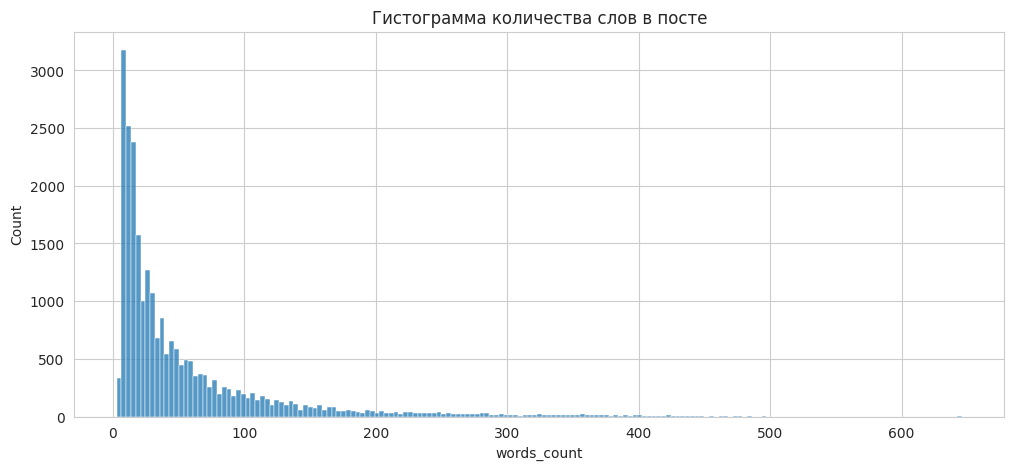

In [ ]:
sns.set_style('whitegrid')
plt.subplots(figsize=(12,5))
sns.histplot(x='words_count', data=df_test_1).set(xlabel='words_count', title='Гистограмма количества слов в посте');

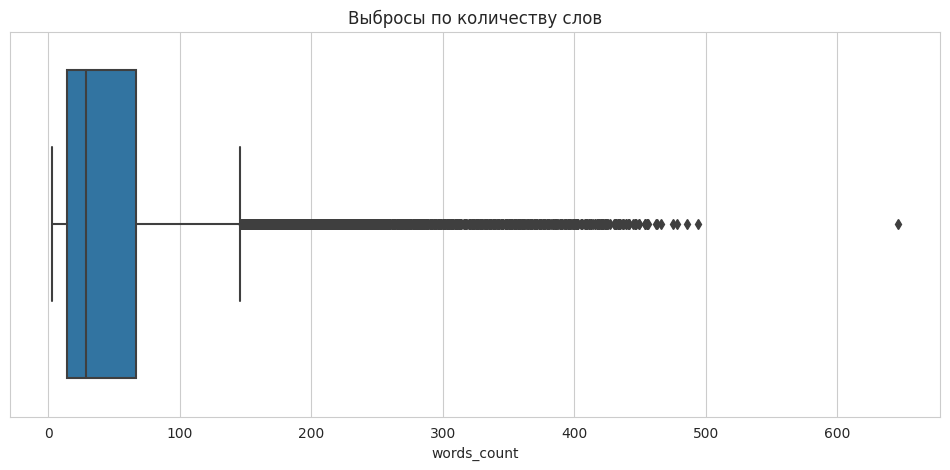

In [ ]:
sns.set_style('whitegrid')
plt.subplots(figsize=(12,5))
sns.boxplot(x='words_count', data=df_test_1).set(xlabel='words_count', title='Выбросы по количеству слов');

In [ ]:
from nltk.tokenize import word_tokenize

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
from string import punctuation
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
from collections import Counter
corpus = [token for tweet in df_test_1.text_words for token in word_tokenize(tweet) if token not in punctuation]

In [ ]:
freq_dict = Counter(corpus) #составляем частотный словарь

freq_dict.most_common(10) # 10 самых частых слов

[('в', 54137),
 ('и', 38643),
 ('на', 27614),
 ('с', 17422),
 ('не', 16675),
 ('что', 14431),
 ('по', 10081),
 ('я', 9189),
 ('это', 7941),
 ('за', 7934)]

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
print(stopwords.words('russian'))

['и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с', 'со', 'как', 'а', 'то', 'все', 'она', 'так', 'его', 'но', 'да', 'ты', 'к', 'у', 'же', 'вы', 'за', 'бы', 'по', 'только', 'ее', 'мне', 'было', 'вот', 'от', 'меня', 'еще', 'нет', 'о', 'из', 'ему', 'теперь', 'когда', 'даже', 'ну', 'вдруг', 'ли', 'если', 'уже', 'или', 'ни', 'быть', 'был', 'него', 'до', 'вас', 'нибудь', 'опять', 'уж', 'вам', 'ведь', 'там', 'потом', 'себя', 'ничего', 'ей', 'может', 'они', 'тут', 'где', 'есть', 'надо', 'ней', 'для', 'мы', 'тебя', 'их', 'чем', 'была', 'сам', 'чтоб', 'без', 'будто', 'чего', 'раз', 'тоже', 'себе', 'под', 'будет', 'ж', 'тогда', 'кто', 'этот', 'того', 'потому', 'этого', 'какой', 'совсем', 'ним', 'здесь', 'этом', 'один', 'почти', 'мой', 'тем', 'чтобы', 'нее', 'сейчас', 'были', 'куда', 'зачем', 'всех', 'никогда', 'можно', 'при', 'наконец', 'два', 'об', 'другой', 'хоть', 'после', 'над', 'больше', 'тот', 'через', 'эти', 'нас', 'про', 'всего', 'них', 'какая', 'много', 'разве', 'три', 'эту', 'моя', 'впр

In [ ]:
noise = stopwords.words('russian')+list(punctuation)

In [ ]:
corpus = [token for tweet in df_test_1.text_words for token in word_tokenize(tweet) if token not in noise]

In [ ]:
from wordcloud import WordCloud

In [ ]:
all_words = " ".join(review for review in corpus)

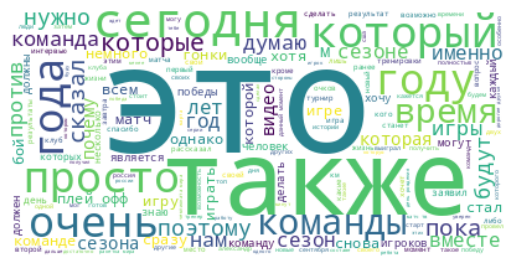

In [ ]:
wordcloud = WordCloud(background_color="white").generate(all_words)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
# на основании облака слов корректируем список стоп-слов
noise_1 = stopwords.words('russian') +list(punctuation)+['это','также','который','сегодня','просто','нужно','однако','очень','поэтому','которая','немного','которые','почему','сразу','могут','хотя','снова', 'пока', 'будут', 'м','всем','й','г','своей','года','нам','свой','лет','год','дня','несколько','мск','против','думаю','должен','немного','однако']

In [ ]:
def remove_stopwords(text, mystopwords = noise_1):
    try:
        return " ".join([token for token in text.split() if not token in mystopwords])
    except:
        return ""

In [ ]:
# стоп-слова и пунктуация
df_test_1['text_without_stop_words'] = df_test_1['text_words'].progress_apply(remove_stopwords)

  0%|          | 0/24833 [00:00<?, ?it/s]

In [ ]:
corpus = [token for tweet in df_test_1.text_without_stop_words for token in word_tokenize(tweet)]

In [ ]:
freq_dict = Counter(corpus) #составляем частотный словарь

freq_dict.most_common(10) # 10 самых частых слов

[('россии', 2278),
 ('время', 2271),
 ('мира', 2099),
 ('команды', 1822),
 ('матч', 1646),
 ('день', 1607),
 ('место', 1555),
 ('игры', 1483),
 ('году', 1432),
 ('бег', 1348)]

In [ ]:
!pip install pymorphy2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 72.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13707 sha256=1ea23bffcc13be99f2aa49e305d1a887868b11560cac231334912d5fe406900a
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt


In [ ]:
import pymorphy2
m = pymorphy2.MorphAnalyzer()

In [ ]:
def lemmatize(text, morph=m):
    try:
        return ' '.join([morph.parse(word)[0].normal_form for word in text.split()])
    except:
        return " "


In [ ]:
# лемматизация
df_test_1['lemma'] = df_test_1['text_without_stop_words'].progress_apply(lemmatize)

  0%|          | 0/24833 [00:00<?, ?it/s]

In [ ]:
corpus = [token for tweet in df_test_1.lemma for token in word_tokenize(tweet)]

In [ ]:
freq_dict = Counter(corpus) #составляем частотный словарь

freq_dict.most_common(10) # 10 самых частых слов

[('команда', 5163),
 ('матч', 4974),
 ('игра', 4633),
 ('наш', 3930),
 ('первый', 3854),
 ('сезон', 3544),
 ('время', 3241),
 ('хороший', 3231),
 ('свой', 3178),
 ('новый', 3151)]

Почему-то опять появились стоп-слова, прогоню ещё раз

In [ ]:
def remove_stopwords(text, mystopwords = noise_1+['наш','свой','хотеть','сказать','сделать','каждый','стать','мочь','смочь','самый']):
    try:
        return " ".join([token for token in text.split() if not token in mystopwords])
    except:
        return ""

In [ ]:
df_test_1['lemma'] = df_test_1['lemma'].progress_apply(remove_stopwords)

  0%|          | 0/24833 [00:00<?, ?it/s]

In [ ]:
corpus = [token for tweet in df_test_1.lemma for token in word_tokenize(tweet)]

In [ ]:
all_words = " ".join(review for review in corpus)

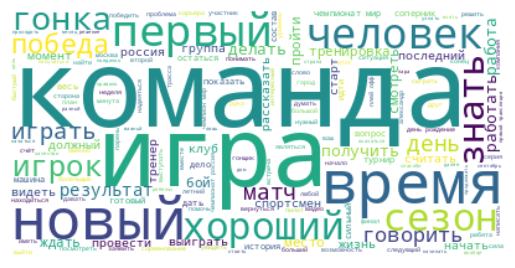

In [ ]:
wordcloud = WordCloud(background_color="white").generate(all_words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
df_test_1.to_csv (r'1_test_1_full.csv', index = None, header=True)

## Добавление признака с извлечением имён

In [ ]:
!pip install "natasha<1" "yargy<0.13"

In [ ]:
from natasha import NamesExtractor

In [ ]:
def extract_name(text):
    if isinstance(text, str):
        extractor = NamesExtractor()
        matches = extractor(text)
        for match in matches:
            start, stop = match.span
            return text[start:stop]


In [ ]:
df_test_1['name'] = df_test_1['text'].map(extract_name)

In [ ]:
df_test_1.head()

,oid,text,text_words,words_count,text_without_stop_words,lemma,name
0,749208109,СПОЧНО СООБЩЕСТВО ПРОДАЕТСЯ ЗА 1300Р ЗА ПОКУПК...,спочно сообщество продается за р за покупкой п...,14,спочно сообщество продается р покупкой пишите ...,спочно сообщество продаваться р покупка писать...,None
1,452466036,Естественное восстановление после тяжелой трен...,естественное восстановление после тяжелой трен...,56,естественное восстановление тяжелой тренировки...,естественный восстановление тяжёлый тренировка...,None
2,161038103,Тема нарядов продолжается Одна из британских ж...,тема нарядов продолжается одна из британских ж...,33,тема нарядов продолжается одна британских журн...,тема наряд продолжаться британский журналистка...,Марии
3,663621910,Привет Избранный. Ты спрашиваешь себя ЧТО здес...,привет избранный ты спрашиваешь себя что здесь...,99,привет избранный спрашиваешь происходит ответ ...,привет избранный спрашивать происходить ответ ...,None
4,566255305,КОРОЛЬ ПЯТИСОТНИКОВ В ДЕЛЕ Андрей Рублев успеш...,король пятисотников в деле андрей рублев успеш...,21,король пятисотников деле андрей рублев успешно...,король пятисотник дело андрей рублёв успешно с...,Андрей Рублев


In [ ]:
df_test_1.to_csv (r'1_test_1_full_name.csv', index = None, header=True)

In [ ]:
df_test_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24833 entries, 0 to 26259
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   oid                      24833 non-null  int64 
 1   text                     24833 non-null  object
 2   text_words               24833 non-null  object
 3   words_count              24833 non-null  int64 
 4   text_without_stop_words  24833 non-null  object
 5   lemma                    24833 non-null  object
 6   name                     13691 non-null  object
dtypes: int64(2), object(5)
memory usage: 1.5+ MB


Имена извлеклись с большим количеством пропусков (более 50%)

##### заполнение пропусков в именах

In [ ]:
df_test_1 = pd.read_csv('1_test_1_full_name.csv')

In [ ]:
X_tmp=df_test_1.dropna()
X_tmp.head()

,oid,text,text_words,words_count,text_without_stop_words,lemma,name
2,161038103,Тема нарядов продолжается Одна из британских ж...,тема нарядов продолжается одна из британских ж...,33,тема нарядов продолжается одна британских журн...,тема наряд продолжаться британский журналистка...,Марии
4,566255305,КОРОЛЬ ПЯТИСОТНИКОВ В ДЕЛЕ Андрей Рублев успеш...,король пятисотников в деле андрей рублев успеш...,21,король пятисотников деле андрей рублев успешно...,король пятисотник дело андрей рублёв успешно с...,Андрей Рублев
5,332983824,19 июня ABL разыграет 100 000 рублей и чемпион...,июня разыграет рублей и чемпионские перстни вс...,236,июня разыграет рублей чемпионские перстни диви...,июнь разыграть рубль чемпионский перстень диви...,Лавочкина
7,770457906,В Уфе пройдет турнир Мемориал Мустафина 25 и 2...,в уфе пройдет турнир мемориал мустафина и авгу...,137,уфе пройдет турнир мемориал мустафина августа ...,уфа пройти турнир мемориал мустафина август со...,Ульфата Мансуровича
8,720955404,Школа шахмат tokenoid tokenoid представляет ур...,школа шахмат представляет урок шахмат в которо...,22,школа шахмат представляет урок шахмат котором ...,школа шахматы представлять урок шахматы рассма...,Михаила Ботвинника


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
le = LabelEncoder()
X_tmp['tr'] = le.fit_transform(X_tmp['name'])

In [ ]:
X=X_tmp[['oid', 'words_count', 'lemma']]

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

In [ ]:
class TextSelector(BaseEstimator, TransformerMixin):
    def __init__(self, key):
        self.key = key

    def fit(self, x, y=None):
        return self

    def transform(self, X):
        return X[self.key]

class ItemSelector(BaseEstimator, TransformerMixin):
    def __init__(self, key):
        self.key = key

    def fit(self, x, y=None):
        return self

    def transform(self, X):
        return X[[self.key]]

In [ ]:
text1 = Pipeline([
    ('selector', TextSelector(key='lemma')),
    ('vect', TfidfVectorizer(ngram_range=(1, 1), max_df=0.85, max_features=None, min_df=1, norm='l2', strip_accents='unicode'))
])
text1.fit_transform(X)

<13691x43827 sparse matrix of type '<class 'numpy.float64'>'
	with 494589 stored elements in Compressed Sparse Row format>

In [ ]:
words_count = Pipeline([
    ('selector', ItemSelector(key='words_count')),
    ('std_scaler', StandardScaler())
])
words_count.fit_transform(X)

array([[-0.47157674],
       [-0.62493439],
       [ 2.12272353],
       ...,
       [-0.58659498],
       [-0.49713635],
       [-0.17764124]])

In [ ]:
oid = Pipeline([
    ('selector', ItemSelector(key='oid')),
    ('std_scaler', StandardScaler())
])
oid.fit_transform(X)

array([[-1.23400239],
       [ 0.1904702 ],
       [-0.62955627],
       ...,
       [-1.07985994],
       [-0.81802692],
       [ 0.74736334]])

In [ ]:
features = FeatureUnion([
    ('text1', text1),
    ('words_count', words_count),
    ('oid', oid),


])

In [ ]:
clf_tmp = Pipeline([
    ('features', features),
    ('clf', LogisticRegression(random_state=42, class_weight='balanced', max_iter=200, multi_class='ovr', penalty=None, solver='sag'))
])
clf_tmp.fit(X, X_tmp['tr'])

Pipeline(steps=[('features',
                 FeatureUnion(transformer_list=[('text1',
                                                 Pipeline(steps=[('selector',
                                                                  TextSelector(key='lemma')),
                                                                 ('vect',
                                                                  TfidfVectorizer(max_df=0.85,
                                                                                  strip_accents='unicode'))])),
                                                ('words_count',
                                                 Pipeline(steps=[('selector',
                                                                  ItemSelector(key='words_count')),
                                                                 ('std_scaler',
                                                                  StandardScaler())])),
                                                ('oid',
                                                 Pipeline(steps=[('selector',
                                                                  ItemSelector(key='oid')),
                                                                 ('std_scaler',
                                                                  StandardScaler())]))])),
                ('clf',
                 LogisticRegression(class_weight='balanced', max_iter=200,
                                    multi_class='ovr', penalty=None,
                                    random_state=42, solver='sag'))])

In [ ]:
import warnings
warnings.filterwarnings('ignore')

Делаем обратное преобразование LabelEncoder и получаем предсказанные данные.

In [ ]:
le.inverse_transform(clf_tmp.predict(df_test_1[df_test_1['name'].isna()][['oid', 'words_count', 'lemma']]))

In [ ]:
df_test_1.loc[df_test_1[df_test_1['name'].isna()].index, 'name'] = le.inverse_transform(clf_tmp.predict(df_test_1[df_test_1['name'].isna()][['oid', 'words_count', 'lemma']]))

In [ ]:
df_test_1.isna().sum()

oid                        0
text                       0
text_words                 0
words_count                0
text_without_stop_words    0
lemma                      0
name                       0
dtype: int64

In [ ]:
df_test_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24833 entries, 0 to 26259
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   oid                      24833 non-null  int64 
 1   text                     24833 non-null  object
 2   text_words               24833 non-null  object
 3   words_count              24833 non-null  int64 
 4   text_without_stop_words  24833 non-null  object
 5   lemma                    24833 non-null  object
 6   name                     24833 non-null  object
dtypes: int64(2), object(5)
memory usage: 2.0+ MB


In [ ]:
df_test_1.to_csv (r'1_test_1_full_name_all.csv', index = None, header=True)

# Обучение модели на полных данных train

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df_train_1 = pd.read_csv('1_train_1_full_name_all.csv')

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
le.fit(df_train_1.category)

LabelEncoder()

In [ ]:
y = pd.Series (le.transform(df_train_1.category))

In [ ]:
X_train=df_train_1[['oid', 'words_count', 'lemma', 'name']]

In [ ]:
class TextSelector(BaseEstimator, TransformerMixin):
    def __init__(self, key):
        self.key = key

    def fit(self, x, y=None):
        return self

    def transform(self, X):
        return X[self.key]

class ItemSelector(BaseEstimator, TransformerMixin):
    def __init__(self, key):
        self.key = key

    def fit(self, x, y=None):
        return self

    def transform(self, X):
        return X[[self.key]]

In [ ]:
text1 = Pipeline([
    ('selector', TextSelector(key='lemma')),
    ('vect', TfidfVectorizer(ngram_range=(1, 1), max_df=0.85, max_features=None, min_df=1, norm='l2', strip_accents='unicode'))
])
text1.fit_transform(X_train)

<35774x61598 sparse matrix of type '<class 'numpy.float64'>'
	with 1041723 stored elements in Compressed Sparse Row format>

In [ ]:
words_count = Pipeline([
    ('selector', ItemSelector(key='words_count')),
    ('std_scaler', StandardScaler())
])
words_count.fit_transform(X_train)

array([[-0.74960008],
       [-0.2502671 ],
       [ 0.80892405],
       ...,
       [-0.35618622],
       [ 0.37011629],
       [-0.62854966]])

In [ ]:
oid = Pipeline([
    ('selector', ItemSelector(key='oid')),
    ('std_scaler', StandardScaler())
])
oid.fit_transform(X_train)

array([[-0.48366677],
       [ 0.00435987],
       [-1.25841116],
       ...,
       [ 0.20058905],
       [ 0.97098658],
       [ 0.26566138]])

In [ ]:
name = Pipeline([
    ('selector', ItemSelector(key='name')),
    ('dict_vec', OneHotEncoder(categories=[df_train_1['name'].unique()], handle_unknown='ignore'))
])
name.fit_transform(X_train)

<35774x9136 sparse matrix of type '<class 'numpy.float64'>'
	with 35774 stored elements in Compressed Sparse Row format>

In [ ]:
features = FeatureUnion([
    ('text1', text1),
    ('words_count', words_count),
    ('oid', oid),
    ('name', name)
])

In [ ]:
df_test_1 = pd.read_csv('1_test_1_full_name_all.csv')

In [ ]:
X_test=df_test_1[['oid', 'words_count', 'lemma', 'name']]

In [ ]:
clf = Pipeline([
    ('features', features),
    ('clf', LogisticRegression(random_state=42, class_weight='balanced', max_iter=200, multi_class='ovr', penalty=None, solver='sag'))
])
clf.fit(X_train, y)

Pipeline(steps=[('features',
                 FeatureUnion(transformer_list=[('text1',
                                                 Pipeline(steps=[('selector',
                                                                  TextSelector(key='lemma')),
                                                                 ('vect',
                                                                  TfidfVectorizer(max_df=0.85,
                                                                                  strip_accents='unicode'))])),
                                                ('words_count',
                                                 Pipeline(steps=[('selector',
                                                                  ItemSelector(key='words_count')),
                                                                 ('std_scaler',
                                                                  StandardScaler())])),
                                                ('oid',
                                                 Pipeline(steps=[('selector',
                                                                  ItemSelector(key...
                                                 Pipeline(steps=[('selector',
                                                                  ItemSelector(key='name')),
                                                                 ('dict_vec',
                                                                  OneHotEncoder(categories=[array(['Виктория Поплавская', 'Треша', 'Доминик Доминатор', ...,
       'Рамазан Гасанов', 'Джо Харрис', 'Бразилиа Бразилия'], dtype=object)],
                                                                                handle_unknown='ignore'))]))])),
                ('clf',
                 LogisticRegression(class_weight='balanced', max_iter=200,
                                    multi_class='ovr', penalty=None,
                                    random_state=42, solver='sag'))])

In [ ]:
pred_clf = clf.predict(X_test)

In [ ]:
pred_clf

array([ 4,  8, 10, ...,  3,  8,  0])

In [ ]:
pred_proba_clf = clf.predict_proba(X_test)
pred_proba_clf

array([[5.61536830e-02, 6.87223326e-02, 6.80891575e-03, ...,
        1.79415616e-03, 3.67961378e-03, 3.61769738e-03],
       [9.08795740e-03, 4.09365475e-03, 1.49748143e-03, ...,
        4.22101657e-03, 6.91903259e-03, 3.09682148e-02],
       [1.47173085e-03, 7.89396158e-03, 3.68117446e-03, ...,
        9.25030670e-01, 2.45895023e-03, 8.04314879e-03],
       ...,
       [5.31353151e-03, 2.65731109e-02, 2.27355688e-03, ...,
        2.57569984e-02, 2.56069210e-03, 1.82188428e-03],
       [2.15432258e-03, 3.61093441e-04, 1.08498914e-03, ...,
        8.69784160e-04, 3.00267404e-03, 1.68830758e-03],
       [9.99004945e-01, 3.42600219e-05, 3.45162634e-05, ...,
        2.48176448e-04, 3.34502707e-05, 5.05949057e-06]])

In [ ]:
df_test_1['pred'] = pred_clf

In [ ]:
df_test_1['proba'] = pred_proba_clf.max(axis=1)

In [ ]:
df_test_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24833 entries, 0 to 26259
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   oid                      24833 non-null  int64  
 1   text                     24833 non-null  object 
 2   text_words               24833 non-null  object 
 3   words_count              24833 non-null  int64  
 4   text_without_stop_words  24833 non-null  object 
 5   lemma                    24833 non-null  object 
 6   name                     24833 non-null  object 
 7   pred                     24833 non-null  int64  
 8   proba                    24833 non-null  float64
dtypes: float64(1), int64(3), object(5)
memory usage: 2.4+ MB


In [ ]:
df_pred=df_test_1.drop(['text','text_words','text_without_stop_words', 'words_count', 'lemma', 'name'], axis=1)

In [ ]:
df_pred['pred']=le.inverse_transform(df_pred['pred'])

In [ ]:
df_pred.head()

,oid,pred,proba
0,749208109,esport,0.590706
1,452466036,martial_arts,0.880029
2,161038103,tennis,0.925031
3,663621910,boardgames,0.411897
4,566255305,tennis,0.993533


In [ ]:
tmp_df_pred = pd.DataFrame(df_pred.groupby(by=['oid', 'pred']).sum().reset_index())

In [ ]:
tmp_df_pred.head(10)

,oid,pred,proba
0,1622114,athletics,3.012543
1,1622114,hockey,0.302586
2,1622114,martial_arts,0.359073
3,1622114,winter_sport,1.030827
4,1663817,autosport,5.267790
5,1663817,extreme,0.939093
6,1663817,winter_sport,0.848820
7,3174332,basketball,6.426487
8,3174332,hockey,0.967355
9,3174332,martial_arts,0.561483


In [ ]:
tmp_df_pred_1 = tmp_df_pred.sort_values(['oid','proba'], ascending=[True, False])

In [ ]:
tmp_df_pred_1.head(40)

,oid,pred,proba
0,1622114,athletics,3.012543
3,1622114,winter_sport,1.030827
2,1622114,martial_arts,0.359073
1,1622114,hockey,0.302586
4,1663817,autosport,5.267790
5,1663817,extreme,0.939093
6,1663817,winter_sport,0.848820
7,3174332,basketball,6.426487
8,3174332,hockey,0.967355
9,3174332,martial_arts,0.561483


In [ ]:
oid = tmp_df_pred_1['oid'].to_list()
category = tmp_df_pred_1['pred'].to_list()
prob = tmp_df_pred_1['proba'].to_list()

In [ ]:
res = {}
for indx, id in enumerate(oid):
    if id not in res:
        res[id] = (category[indx], prob[indx])

submit_data = {k:v[0] for k,v in res.items()}
oid = list(submit_data.keys())
category = list(submit_data.values())
pd.DataFrame({'oid':oid, 'category':category}).to_csv('my_submission.csv', index=False)

# Итоговая оценочная метрика

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('sample_submission.csv')

In [ ]:
df_my = pd.read_csv('my_submission.csv')

In [ ]:
df_my.head()

,oid,category
0,1622114,athletics
1,1663817,autosport
2,3174332,basketball
3,3469228,extreme
4,3905302,boardgames


In [ ]:
df.head()

,oid,category
0,1622114,athletics
1,1663817,autosport
2,3174332,basketball
3,3469228,extreme
4,3905302,boardgames


In [ ]:
df_my.shape[0]

2625

In [ ]:
df.shape[0]

2626

In [ ]:
df.tail()

,oid,category
2621,998309713,esport
2622,998565619,esport
2623,999112505,boardgames
2624,999361308,tennis
2625,999374432,football


In [ ]:
df_my.tail()

,oid,category
2620,998309713,esport
2621,998565619,esport
2622,999112505,boardgames
2623,999361308,tennis
2624,999374432,football


In [ ]:
df_my_1=df_my.copy()

In [ ]:
df_my_1.insert(0, 'oid_true', df['oid'])

In [ ]:
df_my_1['oid_right'] = df_my_1['oid_true'] == df_my_1['oid']

In [ ]:
df_my_1[df_my_1.oid_right==False]

,oid_true,oid,category,oid_right
178,74653939,75044739,extreme,False
179,75044739,75263528,volleyball,False
180,75263528,75344628,volleyball,False
181,75344628,75615802,basketball,False
182,75615802,76441934,extreme,False
...,...,...,...,...
2620,997758226,998309713,esport,False
2621,998309713,998565619,esport,False
2622,998565619,999112505,boardgames,False
2623,999112505,999361308,tennis,False


Потерявшийся пользователь в моём финальном датасете - 74653939

In [ ]:
df_test = pd.read_csv('test.csv')

In [ ]:
df_test[df_test.oid==74653939] # ищем "потеряшку" в исходном тестовом датасете

,oid,text
2464,74653939,На сайте tokentokenoid В платной подписке доба...
5852,74653939,На сайте tokentokenoid В платной подписке доба...
6983,74653939,ВНИМАНИЕ 33 ПОЛУЧИТЕ БЕСПЛАТНЫЕ ПРОГНОЗЫ 33 1....
8060,74653939,На сайте tokentokenoid В платной подписке доба...
9141,74653939,На сайте tokentokenoid В платной подписке доба...
13018,74653939,На сайте tokentokenoid В платной подписке доба...
13686,74653939,ВНИМАНИЕ 33 ПОЛУЧИТЕ БЕСПЛАТНЫЕ ПРОГНОЗЫ 33 1....
18892,74653939,На сайте tokentokenoid В платной подписке доба...
21664,74653939,На сайте tokentokenoid В платной подписке доба...
21948,74653939,На сайте tokentokenoid В платной подписке доба...


In [ ]:
df[df.oid==74653939]

,oid,category
178,74653939,basketball


In [ ]:
df_my=pd.DataFrame(np.insert(df_my.values, 178, values=['74653939', 'basketball'], axis= 0), columns=df_my.columns)

In [ ]:
df_my

,oid,category
0,1622114,athletics
1,1663817,autosport
2,3174332,basketball
3,3469228,extreme
4,3905302,boardgames
...,...,...
2621,998309713,esport
2622,998565619,esport
2623,999112505,boardgames
2624,999361308,tennis


In [ ]:
df_my.iloc[177:182]

,oid,category
177,74652019,football
178,74653939,basketball
179,75044739,extreme
180,75263528,volleyball
181,75344628,volleyball


In [ ]:
df.iloc[177:182]

,oid,category
177,74652019,football
178,74653939,basketball
179,75044739,extreme
180,75263528,volleyball
181,75344628,volleyball


In [ ]:
df.columns = ['oid_true', 'category_true']

In [ ]:
df_my_concat = pd.concat([df_my, df], axis=1)
df_my_concat

,oid,category,oid_true,category_true
0,1622114,athletics,1622114,athletics
1,1663817,autosport,1663817,autosport
2,3174332,basketball,3174332,basketball
3,3469228,extreme,3469228,extreme
4,3905302,boardgames,3905302,boardgames
...,...,...,...,...
2621,998309713,esport,998309713,esport
2622,998565619,esport,998565619,esport
2623,999112505,boardgames,999112505,boardgames
2624,999361308,tennis,999361308,tennis


In [ ]:
df_my_concat['oid_right'] = df_my_concat['oid_true'] == df_my_concat['oid']
df_my_concat['category_right'] = df_my_concat['category_true'] == df_my_concat['category']

Cчитаем, сколько раз модель сделала верное предсказание:

In [ ]:
df_my_concat[df_my_concat['category_right'] == True].shape[0]

2450

In [ ]:
df_my_concat[df_my_concat.category_right==False].shape[0]

176

Cчитаем долю правильных ответов (количество значений True поделить на количество объектов):

In [ ]:
df_my_concat['category_right'].sum() / df_my_concat.shape[0]

0.9329779131759329

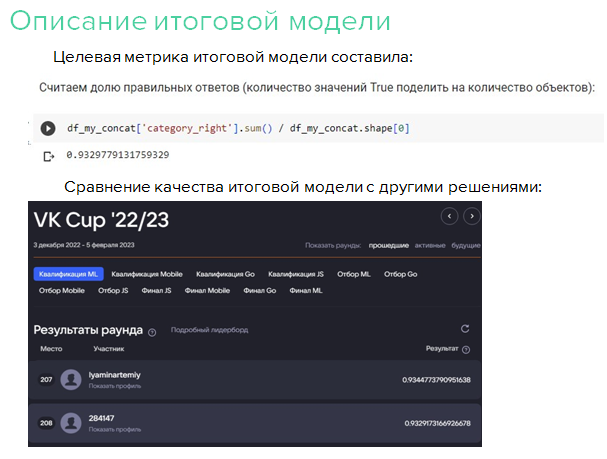